## Instructions

- This assignment was posted on Monday, 11 November, 2024 and is due on Friday, 29 November 2024, at 11:59 pm. 
- **This deadline is firm** unless you have made alternative arrangements with the instructor (e.g. a short-term absence, or used one of your 48-hour extensions). **The dropbox WILL close at midnight on the due date.**
- Answer all questions in this Jupyter notebook skeleton within the provided cells. Questions will indicate whether the answer should take the form of a coded or written response. Use the dropdown menu within the Jupyter interface to toggle between 'Markdown' or 'Code' for the cells. Do NOT delete or rearrange any of the question blocks within this skeleton.
- The following two files should be submitted to LEARN:
    - This IPYNB file containing the questions and your answers in either code or markdown.
    - A PDF printout of this IPYNB file. To generate this, first run and save the output of all cells. Then expand all cells and print as PDF. Be sure that all your code and answers are visible in the PDF document you submit. 
- The total number of marks for this assignment is 100.

## Exercise 1. Multilayer Perceptrons

The XOR problem is significant in the field of machine learning as it brought the limitations of simple linear models (like the Perceptron) into sharp focus. XOR is a binary classification problem that is not linearly separable (as can be seen in the output of the next cell block), meaning a single-layer perceptron (or linear model) cannot correctly classify the XOR dataset. This realization motivated the development of multilayer perceptrons (MLPs) with hidden layers, which can learn complex, non-linear decision boundaries through layered representations. 

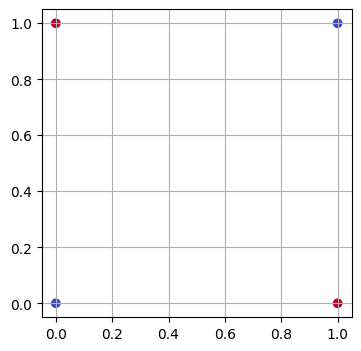

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data_xs = np.array([[0,0],[0,1],[1,0],[1,1]])
data_ys = np.array([[0,1,1,0]])

fig,ax = plt.subplots(1,1,figsize=(4.,4.))
ax.scatter(data_xs[:,0],data_xs[:,1],c = data_ys.ravel(),cmap='coolwarm')
ax.grid(True)
plt.show()

### EXERCISE1-TASK1: [20 marks] 

Build a simple multilayer perceptron (MLP) from scratch using only the NumPy library to solve the XOR classification problem. 

**Detailed Instructions**: Make an MLP with one hidden layer that has two neurons, each of which has a ReLU activation function. Use the sigmoid activation function for the output layer. Use cross-entropy loss as the training objective. Initialize the input weights as small, random values to introduce asymmetry, and initialize the biases to zero. 

Train the network using the data in the cell blocks above: `data_xs` and `data_ys`, and train for 200 iterations. Every 20 iterations, record the training loss and examine the learned feature representations as well as the output of the model. Specifically, visualize the hidden layer activations and model output across as a heatmap over the input space ranging from -0.5 to 1.5 (for both features) to observe how the model differentiates between input regions. Use a colormap normalized between 0 and 1 for heatmaps to clearly visualize these activations. 

epoch 19 loss: 0.71


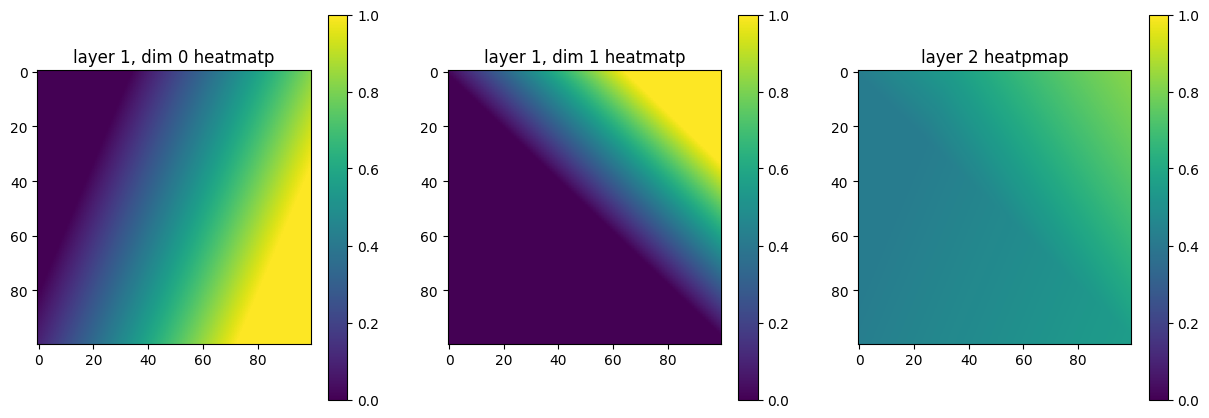

epoch 39 loss: 0.76


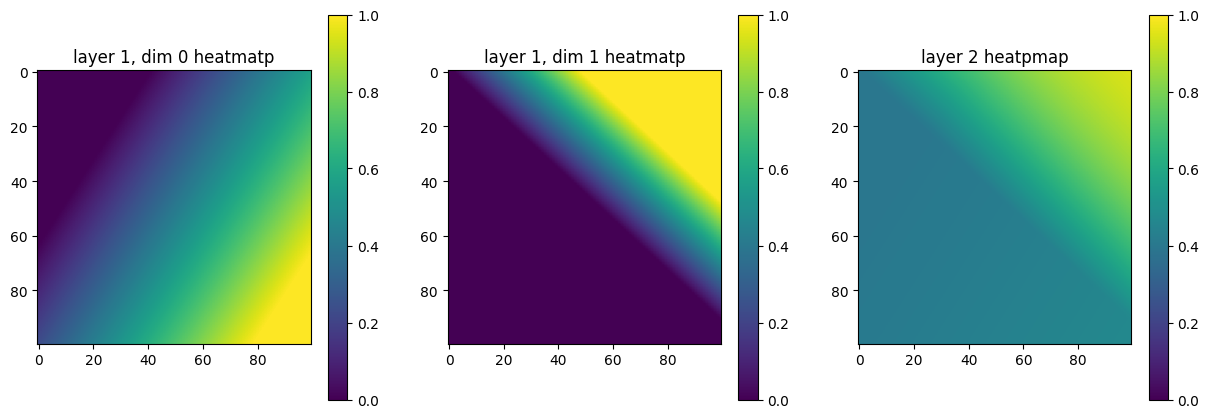

epoch 59 loss: 0.83


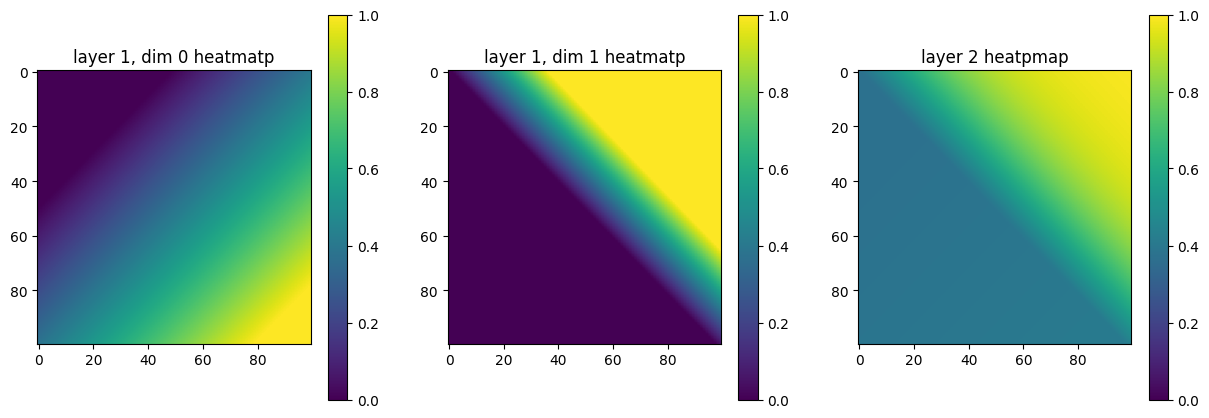

epoch 79 loss: 0.88


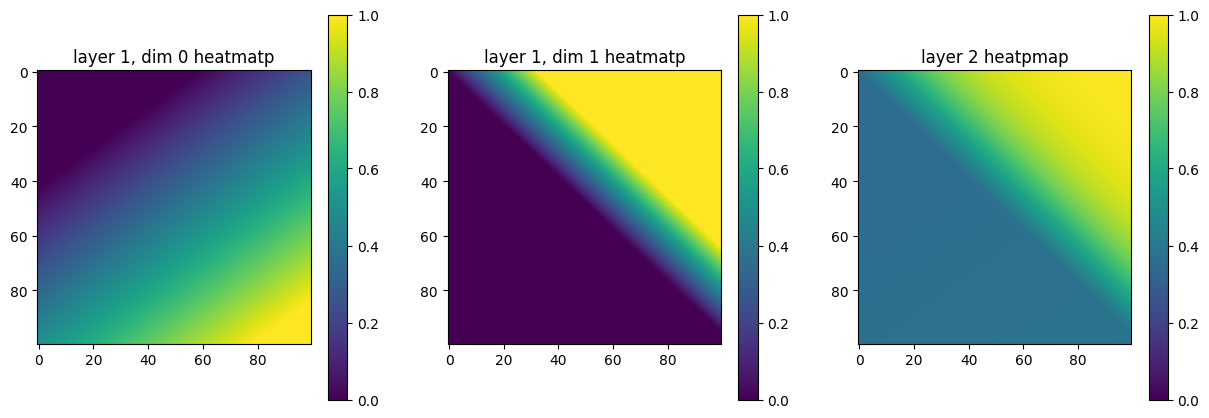

epoch 99 loss: 0.95


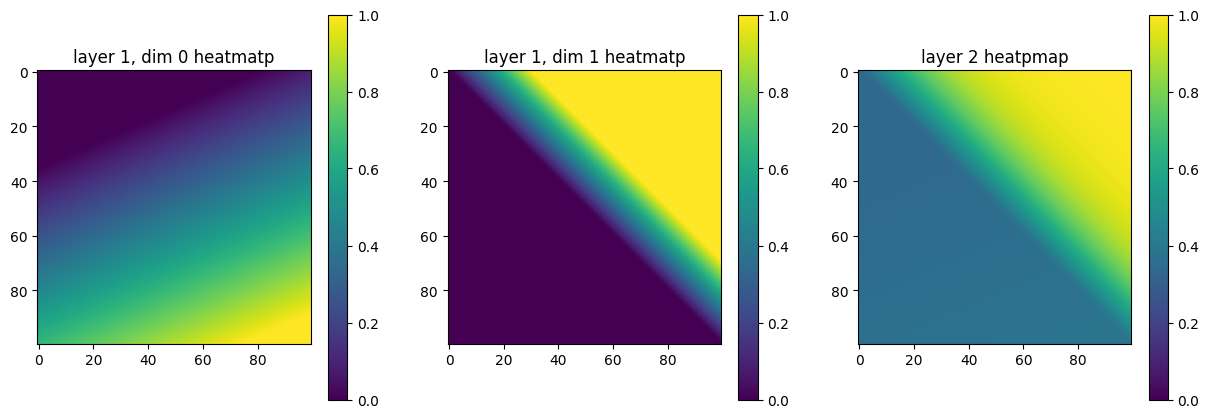

epoch 119 loss: 1.00


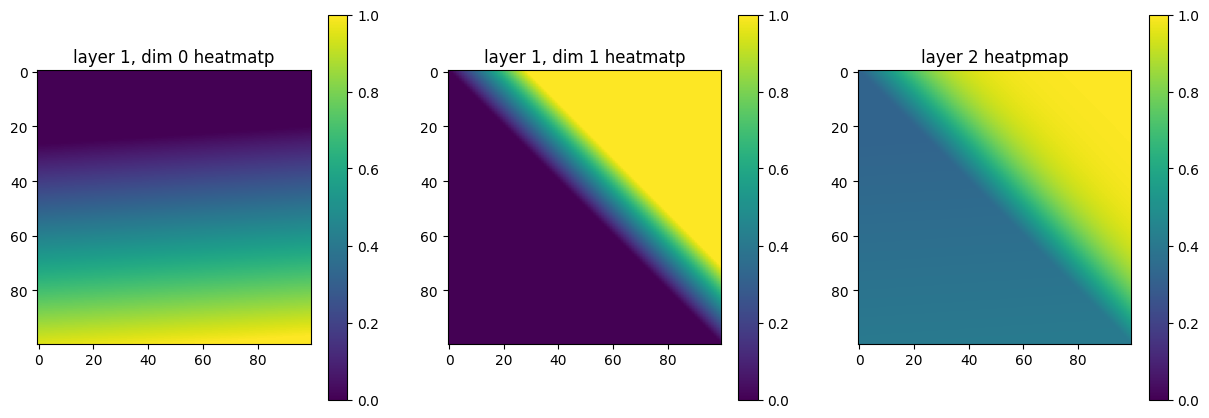

epoch 139 loss: 1.01


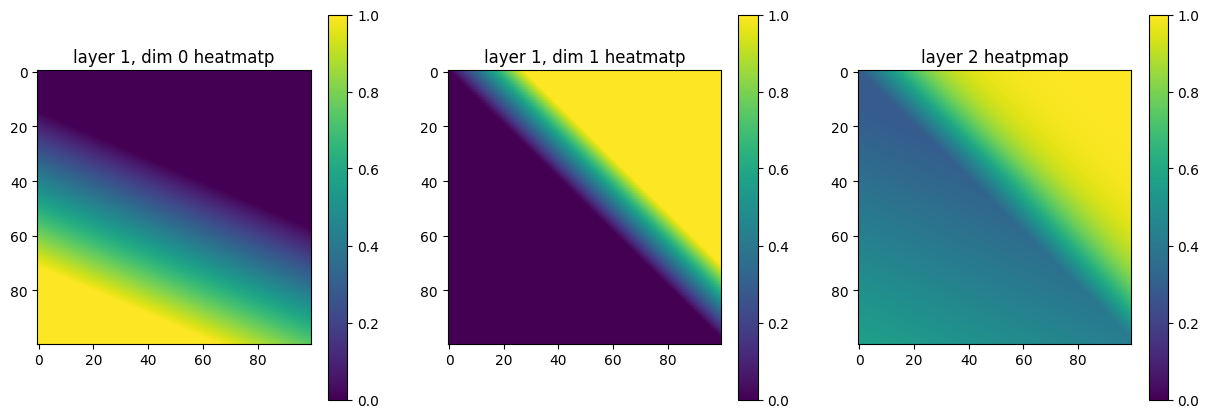

epoch 159 loss: 1.06


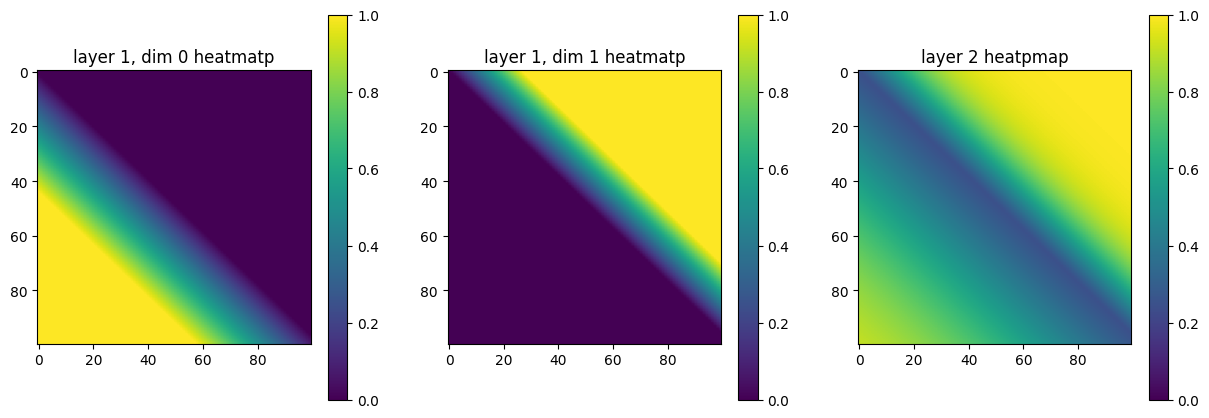

epoch 179 loss: 1.19


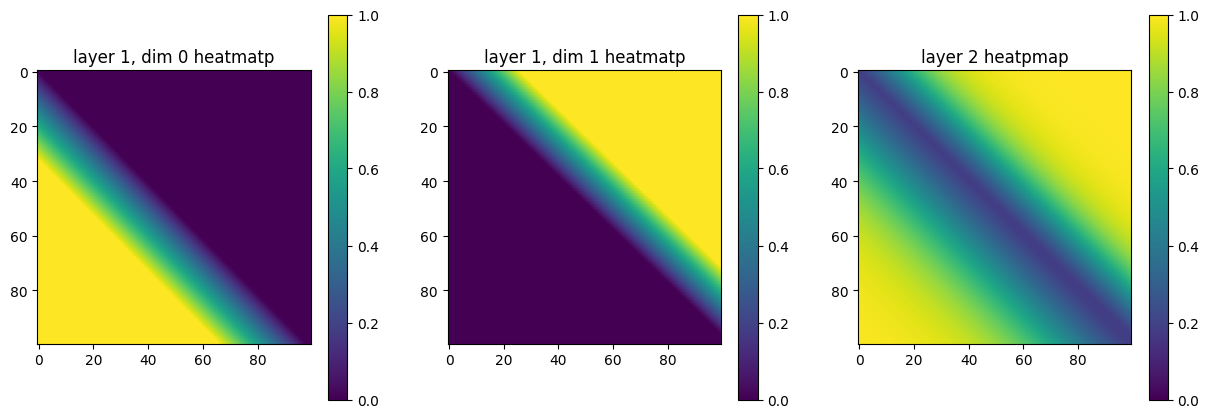

epoch 199 loss: 1.34


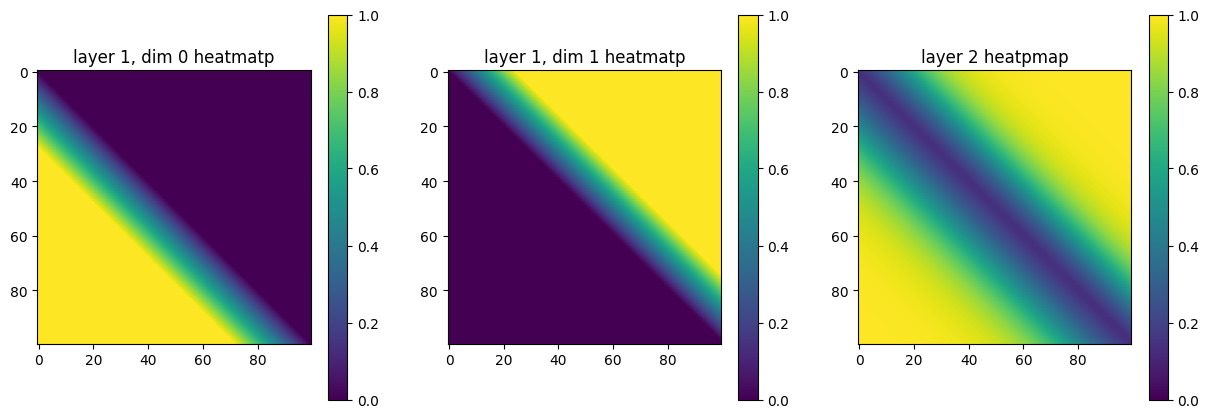

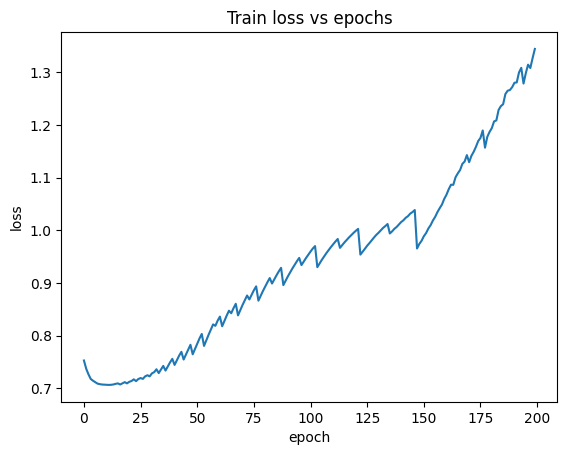

In [104]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def loss_fn(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

w1 = np.random.randn(2, 2)
b1 = np.zeros((1, 2))
w2 = np.random.randn(2, 1)
b2 = np.zeros((1, 1))

lr = 0.1
epochs = 200

losses = []
for epoch in range(epochs):
    z1 = np.dot(data_xs, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    loss = loss_fn(data_ys, a2)
    losses.append(loss)

    dz2 = a2 - data_ys.T

    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, w2.T) * (z1 > 0).astype(float)
    dw1 = np.dot(data_xs.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    if (epoch + 1) % 20 == 0:
        print(f"epoch {epoch} loss: {loss:.2f}")

        dim1_vals = np.linspace(-0.5, 1.5, 100)
        dim2_vals = np.linspace(-0.5, 1.5, 100)
        x = np.array([[x, y] for x in dim1_vals for y in dim2_vals])

        z1 = np.dot(x, w1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        a1 = a1.reshape(100, 100, 2)
        a2 = a2.reshape(100, 100)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i in range(2):
            im = axes[i].imshow(a1[:, :, i], vmin=0, vmax=1)
            axes[i].set_title(f'layer 1, dim {i} heatmatp')
            fig.colorbar(im, ax=axes[i])

        im = axes[-1].imshow(a2, vmin=0, vmax=1)
        axes[-1].set_title('layer 2 heatpmap')
        fig.colorbar(im, ax=axes[-1])

        plt.show()

plt.figure()
plt.plot(losses)
plt.title("Train loss vs epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [109]:
def predict(x):
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return a2

y_hat = predict(data_xs)
y_hat = (y_hat > 0.5).astype(int)

print(y_hat.T)
print(data_ys)

[[0 1 1 0]]
[[0 1 1 0]]


## Exercise 2. Convolutional Neural Networks

### EXERCISE2-TASK1: [10 marks]
Explore feature extraction in image processing by implementing a set of convolutional filters using PyTorch, by implementing convolution kernels and applying them to an image dataset. 

**Detailed instructions:** Reproduce the horizontal and vertical edge detectors encountered in class, as well as two diagonal edge detectors, a blurring kernel, and a pass-through (identity) kernel that leaves the image unaltered. Start by using PyTorch to define your tensors, and then write a function, `corr2d`, from scratch to perform the 2D convolution operations. This function should take in an input matrix and a kernel, and output the resulting convolved matrix. To ensure seamless edge detection across the image boundaries, use padding of 2 pixels around each input image. The `corr2d` function should pre-allocate a tensor to store the resulting feature maps from each convolution operation.

For this exercise, use the `load_digits` dataset from the `sklearn.datasets` module, which provides a set of 8x8 grayscale images of handwritten digits. This dataset is commonly used for classification tasks and serves as an excellent basis for applying image filters, as each image contains clear structural features that are easily highlighted by edge detection and blurring kernels. 

Finally, apply each of the six kernels to 5 images in this dataset from 5 different classes and visualize the resulting feature maps to observe how each kernel emphasizes different visual elements. Be sure to label the type of convolution applied in each of your plots.

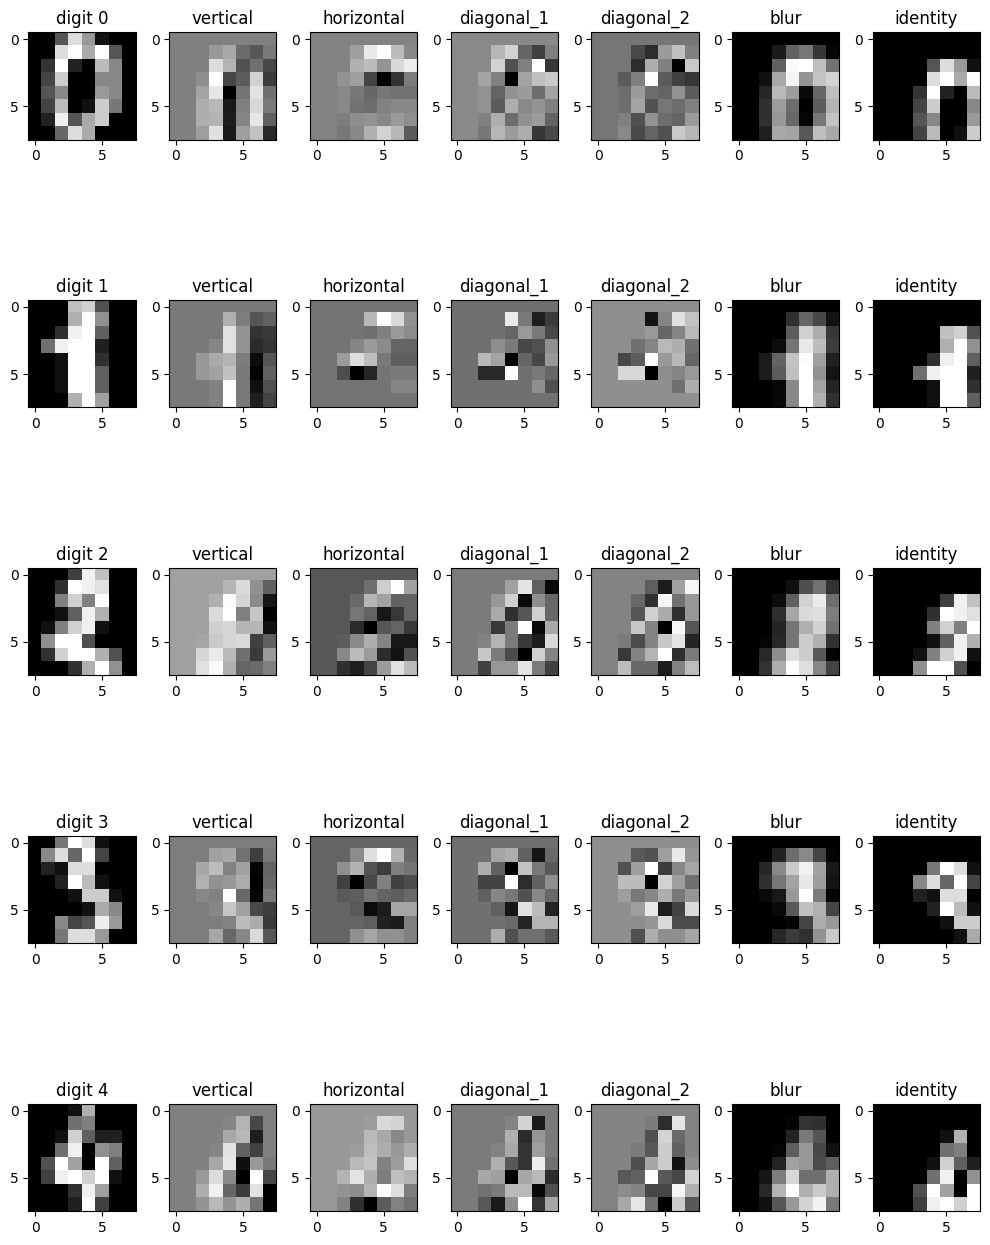

In [16]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

from sklearn.datasets import load_digits
import torch
import numpy as np
import matplotlib.pyplot as plt

vertical_kernel = torch.tensor([[-1, 1], [-1, 1]], dtype=torch.float32)
horizontal_kernel = torch.tensor([[-1, -1], [1, 1]], dtype=torch.float32)
diagonal_1_kernel = torch.tensor([[1, -1], [-1, 1]], dtype=torch.float32)
diagonal_2_kernel = torch.tensor([[-1, 1], [1, -1]], dtype=torch.float32)
blur_kernel = torch.tensor([[0.25, 0.25], [0.25, 0.25]], dtype=torch.float32)
identity_kernel = torch.tensor([[1, 0], [0, 0]], dtype=torch.float32)
 
kernels = [vertical_kernel, horizontal_kernel, diagonal_1_kernel, diagonal_2_kernel, blur_kernel, identity_kernel]
kernel_names = ['vertical', 'horizontal', 'diagonal_1', 'diagonal_2', 'blur', 'identity']

def corr2d(x, kernel):
    h, w = x.shape
    k_h, k_w = kernel.shape # 2x2

    x_pad = torch.zeros((h + 4, w + 4), dtype=torch.float32)
    x_pad[2:h+2, 2:w+2] = x
    
    output = torch.zeros((h, w), dtype=torch.float32)
    
    for i in range(h):
        for j in range(w):
            x_slice = x_pad[i:i+k_h, j:j+k_w]
            output[i, j] = torch.sum(x_slice * kernel)
    
    return output

digits = load_digits()

fig, axes = plt.subplots(5, 7, figsize=(5*2, 7*2))

for i in range(5):
    x = torch.tensor(digits.images[i], dtype=torch.float32)
            
    axes[i, 0].imshow(x, cmap='gray')
    axes[i, 0].set_title(f'digit {i}')

    for j, kernel in enumerate(kernels):
        feature_map = corr2d(x, kernel)
        
        axes[i, j+1].imshow(feature_map.numpy(), cmap='gray')
        axes[i, j+1].set_title(kernel_names[j])

plt.tight_layout()
plt.show()

### EXERCISE2-TASK2: [10 marks]

Apply pooling operations to feature maps generated using the convolution kernels you defined in EXERCISE2-TASK1, to explore how pooling impacts spatial resolution. 

**Detailed instructions:** Write a function, `pool2d` that performs pooling on a given feature map. This function should support both max-pooling and average-pooling modes and take in the window size for pooling as an argument.
Next, apply your `pool2d` function to each of the feature maps generated in EXERCISE2-TASK1. Visualize the pooled feature maps to understand how much detail is retained.

Pooling is typically used to lower the resolution in a convolutional neural network, to balance the increase in feature map channels after convolution. Print out the dimensionality of an original training example, and the dimensionality after the pooling step.

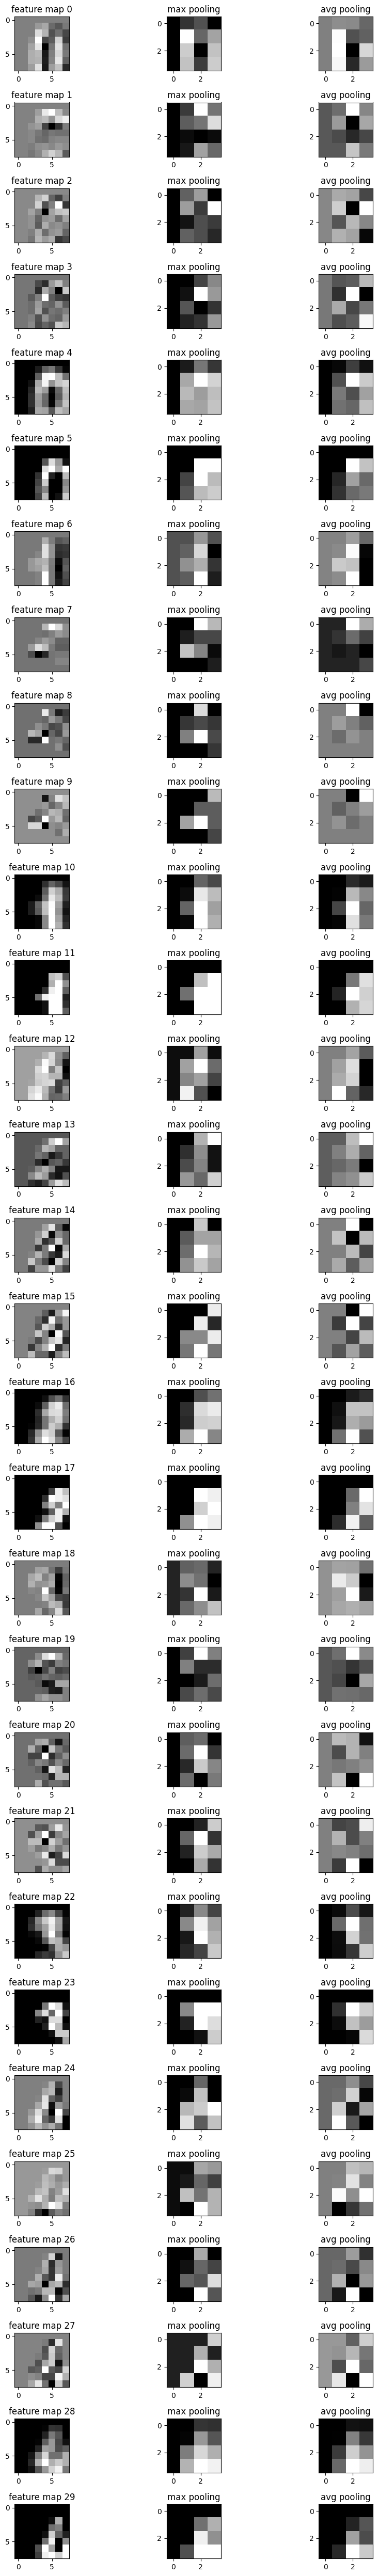

In [24]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

def pool2d(x, kernel_size = 2, mode = 'max'):
    h, w = x.shape
    out_h = h // kernel_size
    out_w = w // kernel_size
    
    x_out = torch.zeros((out_h, out_w), dtype=torch.float32)
    
    for i in range(out_h):
        for j in range(out_w):
            window = x[i*kernel_size:i*kernel_size+kernel_size, j*kernel_size:j*kernel_size+kernel_size]
            
            if mode == 'max':
                x_out[i, j] = torch.max(window)
            else:
                x_out[i, j] = torch.mean(window)
    
    return x_out

digits = load_digits()

feature_maps = []

for i in range(5):
    x = torch.tensor(digits.images[i], dtype=torch.float32)

    for j, kernel in enumerate(kernels):
        feature_map = corr2d(x, kernel)
        feature_maps.append(feature_map)

fig, axes = plt.subplots(len(feature_maps), 3, figsize=(10, 50))

for i in range(len(feature_maps)):
    x = feature_maps[i]
            
    axes[i, 0].imshow(x, cmap='gray')
    axes[i, 0].set_title(f'feature map {i}')

    max_pooled = pool2d(x, kernel_size=2, mode='max')
    axes[i, 1].imshow(max_pooled, cmap='gray')
    axes[i, 1].set_title('max pooling')

    avg_pooled = pool2d(x, kernel_size=2, mode='avg')
    axes[i, 2].imshow(avg_pooled, cmap='gray')
    axes[i, 2].set_title('avg pooling')

plt.tight_layout()
plt.show()    

### EXERCISE2-TASK3: [10 marks]
Build a Convolutional Neural Network using the PyTorch library. 

**Detailed instructions:** 
Implement a CNN with an initial convolutional layer with 8 filters of size 3x3, padding set to 1, followed by a `ReLU` activation function.
A second convolutional layer with 3 filters of size 3x3, again with padding 1 and followed by `ReLU` activation function.
A max pooling layer with a 2x2 kernel to downsample the features.
A fully connected layer with 120 units, followed by another fully connected layer with 84 units.
Finally, the output layer should have 10 units for classification (one for each digit from 0 to 9). 

In the next cell block, include an image of a hand-drawn sketch of the architecture specified. 
In the cell block after that, implement the CNN using the PyTorch library.

In [ ]:
### SOLUTION BLOCK ###
### LINK A HAND-DRAWN SKETCH OF YOUR CNN ARCHITECTURE HERE ###

In [30]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dense_1 = nn.Linear(3 * 4 * 4, 120)
        self.dense_2 = nn.Linear(120, 84)
        self.dense_3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 3 * 4 * 4)
        x = F.relu(self.dense_1(x))
        x = F.relu(self.dense_2(x))
        x = self.dense_3(x)
        return x

model = CNN()

x = torch.randn(1, 1, 8, 8)
output = model(x)
print(output.shape)

torch.Size([1, 10])


### EXERCISE2-TASK4: [10 marks]
Train the CNN on the `load_digits` dataset from `sklearn` using stochastic gradient descent, while monitoring both training loss and validation loss.

**Detailed Instructions** Start by preprocessing the load_digits dataset by normalizing the pixel values to fall between 0 and 1. Partition the data into 40% training, 40% validation, and 20% testing using repeated applications of `sklearn.model_selection.train_test_split`.

Use stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.001 and momentum of 0.9.
Train this CNN for a minimum of 1000 epochs with a batch size of 16. 
Every epoch, record both the training and validation loss. Employ check-pointing to save a copy of the model when validation loss improves. We recommend using a progress bar from the `tqdm` library to monitor training progress, as this part can take several minutes.

After training, plot both the training loss over time and the validation loss. 
Evaluate the best model's performance on the retained test dataset and report the final accuracy.

100%|██████████| 1000/1000 [01:18<00:00, 12.72it/s]


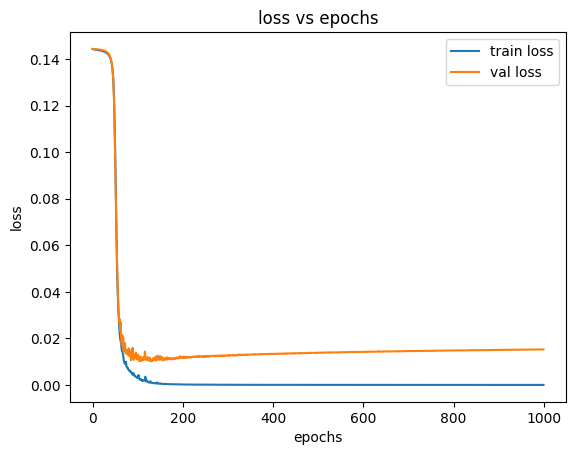

acc: 0.9472222222222222


In [35]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import copy

digits = load_digits()
x = digits.data
y = digits.target

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_val, x_test, y_val, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_val, y_val, test_size=0.5, random_state=42
)

x_train = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1, 8, 8)
y_train = torch.tensor(y_train, dtype=torch.long)
x_val = torch.tensor(x_val, dtype=torch.float32).reshape(-1, 1, 8, 8)
y_val = torch.tensor(y_val, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1, 8, 8)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model = CNN()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
num_epochs = 1000

train_losses = []
val_losses = []
best_val_loss = 1e10
weights = None

for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = loss_fn(output, target)
            val_loss += loss.item()
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        weights = copy.deepcopy(model.state_dict())

plt.figure()
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.legend()
plt.show()

model.load_state_dict(weights)
model.eval()
with torch.no_grad():
    test_output = model(x_test)
    _, predicted = torch.max(test_output, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
print(f"acc: {accuracy}")



### EXERCISE2-TASK5: [10 marks]

Compare the classification performance of your Convolutional Neural Network (CNN) to a traditional Support Vector Classifier (SVC) on the `load_digits` dataset from `sklearn`.

**Detailed Instructions**: Use the same train/validation/test split as used to train the CNN. Treat the pixels as independent features (i.e. flatten the input arrays). Use `sklearn.svm.SVC` and set `gamma=0.001` to control the influence of each training sample. Use the default settings for other parameters, and train on the flattened version of the images.
Write a few sentences to reflect on which model performed better and why, and how you might improve on the worse-performing model.

In [36]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

svc = SVC(gamma=0.001)
svc.fit(x_train_flat, y_train)

y_pred = svc.predict(x_test_flat)
acc = accuracy_score(y_test, y_pred)
print(f"acc: {acc}")

acc: 0.19722222222222222


In [37]:
# SVC is considerably worse than the CNN. It gets 20% accuracy, while the CNN gets 94% accuracy. The CNN is likely better becasue it can take advantage of the 2d structure of the data. The fact that the pixels are not independent is not implicitly captured by the representations leanred by the SVM but is captured by the CNN because of its 2d conv layers.


## Exercise 3. Recurrent Neural Networks

The code in the block below was minimally adapted from an implementation of a character-level RNN developed by Andrej Karpathy, and referenced in his excellent blog post "The unreasonable effectiveness of RNNs": http://karpathy.github.io/2015/05/21/rnn-effectiveness/ 

In [2]:
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np

def lossFun(inputs, targets, hprev):
    """
    inputs,targets are both list of integers.
    hprev is Hx1 array of initial hidden state
    returns the loss, gradients on model parameters, and last hidden state
    """
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars

        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
        
    # backward pass: compute gradients going backwards
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
    """ 
    sample a sequence of integers from the model 
    h is memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    
    ps = []
    for t in range(n):
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes, ps

data = 'the quick brown fox jumped over the lazy dog.'
print('Training Data: \n', data)

chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
sample_length = data_size-1
seq_length =  sample_length # number of steps to unroll the RNN for
learning_rate = 1e-1

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

max_iters = 500
while n < max_iters:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    if p+seq_length+1 >= len(data) or n == 0: 
        hprev = np.zeros((hidden_size,1)) # reset RNN memory
        p = 0 # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
    targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

    # sample from the model now and then
    if n % 5 == 0:
        # print('input character: ', ix_to_char[inputs[0]])
        sample_ix, ps = sample(hprev, inputs[0], sample_length)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print('Iteration %d (loss: %f) Output: \n ----\n %s \n----' % (n, smooth_loss, txt))

    # forward seq_length characters through the net and fetch gradient
    loss, dWxh, dWhh, dWhy, dbh, dby, hprev, logits = lossFun(inputs, targets, hprev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001
    if n % 100 == 0:
        print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

    # perform parameter update with Adagrad
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

    p += seq_length # move data pointer
    n += 1 # iteration counter 

Training Data: 
 the quick brown fox jumped over the lazy dog.
data has 45 characters, 27 unique.
Iteration 0 (loss: 145.016822) Output: 
 ----
 ald wzzknydan.cixylqgzljhiymrbtogly.thugxjgv 
----
iter 0, loss: 145.016829
Iteration 5 (loss: 145.299405) Output: 
 ----
 pm vy.y.y.y.yvy.y. .y.y.y.y. vy.y.yv .y.y.y. 
----
Iteration 10 (loss: 145.755014) Output: 
 ----
 he qdm e oordoehof owmoe oemoquqo coemor oo  
----
Iteration 15 (loss: 145.757793) Output: 
 ----
 ce fur gehjtwh faqzcexhjdhgjeu gahxee.gk.hpp 
----
Iteration 20 (loss: 145.503746) Output: 
 ----
 geyqozc.d y.hhgc.zy.hzgthx thhcoa gvemyhoigg 
----
Iteration 25 (loss: 145.270815) Output: 
 ----
 he quickdmp wn o.mojaxpfuz cdx cabrohxojtx o 
----
Iteration 30 (loss: 144.887826) Output: 
 ----
 herquickabovebrh oyewmpvh pfhng.eog.hzr.doct 
----
Iteration 35 (loss: 144.455018) Output: 
 ----
 oe quick bgodx jwx twb jdzrfdx juzyldo thr . 
----
Iteration 40 (loss: 143.916057) Output: 
 ----
 he juic. browe eun jdnyjd  dhm eox jomp

### EXERCISE3-TASK1: [10 marks] 

Modify the code to inspect the conditioned probability distributions over candidate characters, at each point in the sequence, and how those distributions evolve over training.

**Detailed instructions:** Every 20th pass over the training data, generate a heatmap to visualize the conditioned distributions at each character position. The actual sequence characters (e.g., `t`, `h`, `e`,` `, `l`, `a`, `z`, `y`, ...) should be the column labels of the heatmap, representing the positions within the input sequence. The rows should represent all possible candidate characters (e.g.,` `,`.`, `a`, `b`, `c`, ...) from the dataset vocabulary.

To do this, modify the RNN code to capture the probabilities of each candidate character (i.e., `ps` dictionary in the forward pass) for each position in the input sequence. Each cell in the heatmap will represent the probability of a particular candidate character (row) occurring at a specific position in the sequence (column). Overlay a scatterplot on each heatmap generated to show the correct character among the candidates (in matplotlib, this can be done by setting `facecolor='none'` to ensure that the colors of the underlying heatmap are not obscured by the scatter points).

Training Data: 
 the quick brown fox jumped over the lazy dog.
data has 45 characters, 27 unique.
Iteration 0 (loss: 145.016822) Output: 
 ----
 lcvwdfohfnwdxq t..h.ouuzgavxvlm.jmrdmoaemorc 
----


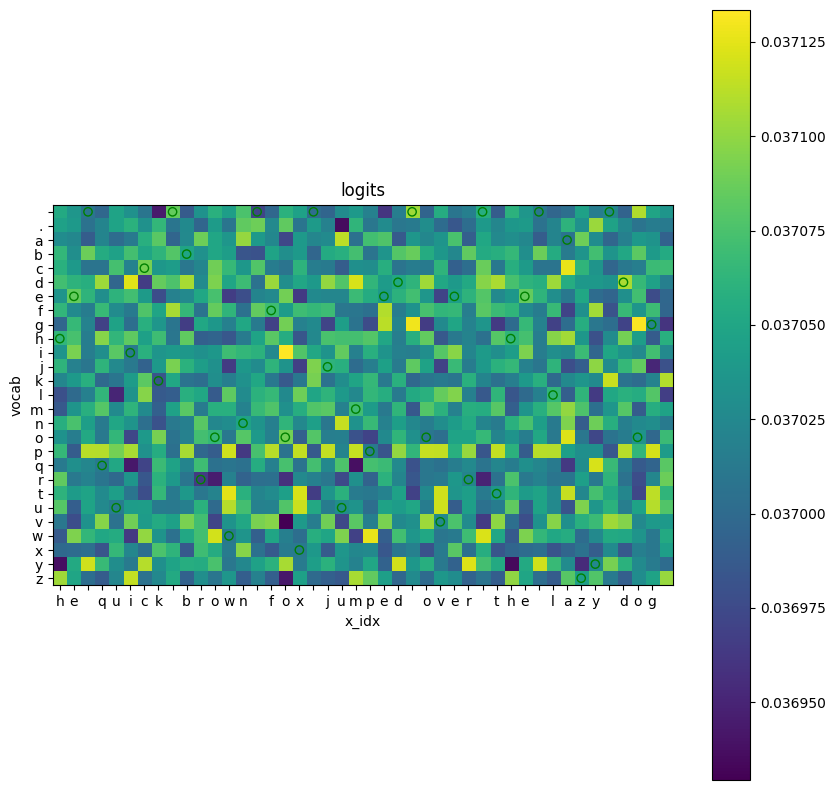

iter 0, loss: 145.016820
Iteration 5 (loss: 145.309481) Output: 
 ----
 heiippwnd.mmmpnvgikmpdbgimhpwnv. mpdddghcmpb 
----
Iteration 10 (loss: 145.676450) Output: 
 ----
 hezivvvcrjjuhrrww vneox.dk.qbhbwhd fuxtijhbw 
----
Iteration 15 (loss: 145.746120) Output: 
 ----
 heqqirtck  v zjaw tdg pdw x vfwpvf.alawzym y 
----
Iteration 20 (loss: 145.652357) Output: 
 ----
  eqquicku o.vwokzg.ovoottdondrvnrxamrzgnrrr. 
----


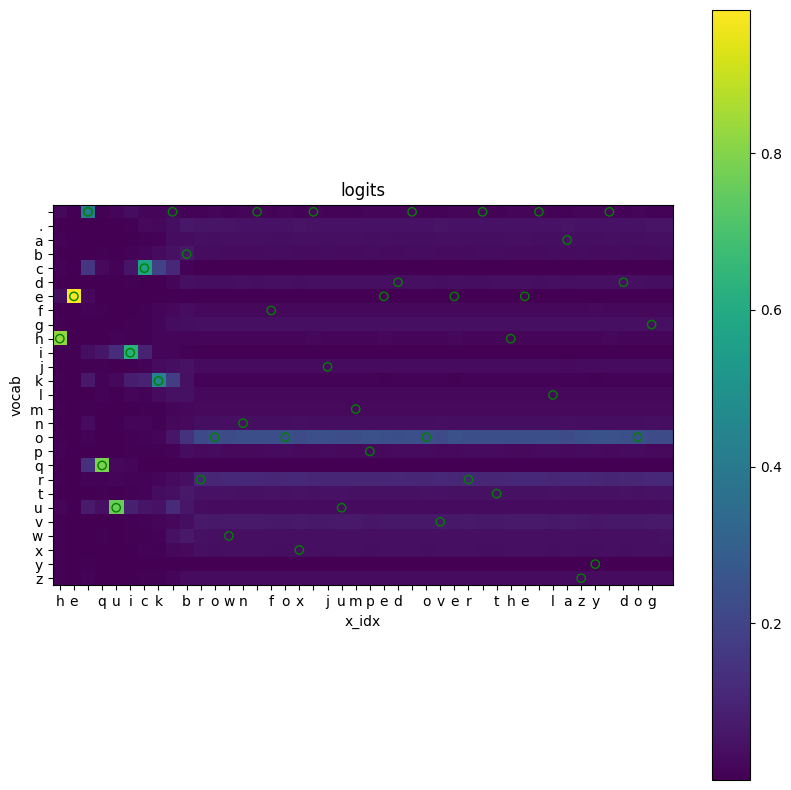

Iteration 25 (loss: 145.520195) Output: 
 ----
 he uuiujt wulvzyvbp gmm i fl  pyuj hl  fab   
----
Iteration 30 (loss: 145.361126) Output: 
 ----
 he quickcdojtf edeoopxezgrpylumoyyppyefeopfu 
----
Iteration 35 (loss: 145.181918) Output: 
 ----
 he zribkkn grx.x  atp rtd z. ewaa.paevxexbr  
----
Iteration 40 (loss: 144.982400) Output: 
 ----
 he qudxkkezagnddxaya.joenpjveunewdmmf.mueeem 
----


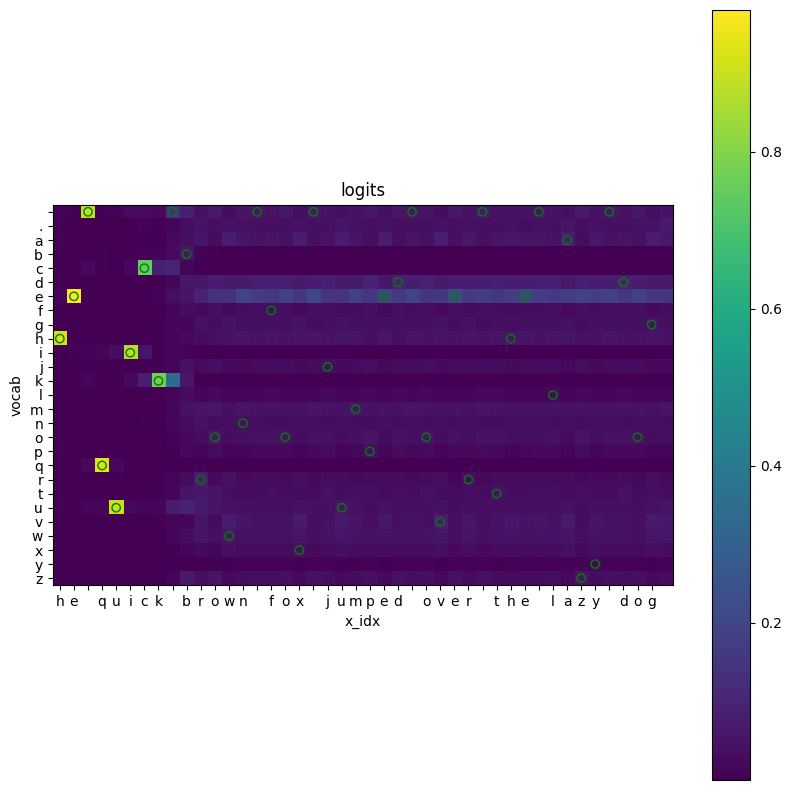

Iteration 45 (loss: 144.790609) Output: 
 ----
 heiqubcb bmlo dye   hpy d op p  yy ynooxl oy 
----
Iteration 50 (loss: 144.574927) Output: 
 ----
 he quickkbolojorxwnvleyx.uamoxzauory  ynaodt 
----
Iteration 55 (loss: 144.327128) Output: 
 ----
 he qui dw oolf ddhneygdhjpof ea  gexu oy lap 
----
Iteration 60 (loss: 144.093922) Output: 
 ----
 .e quic  ze   uwd rpwo az dpztb ohy l mouhto 
----


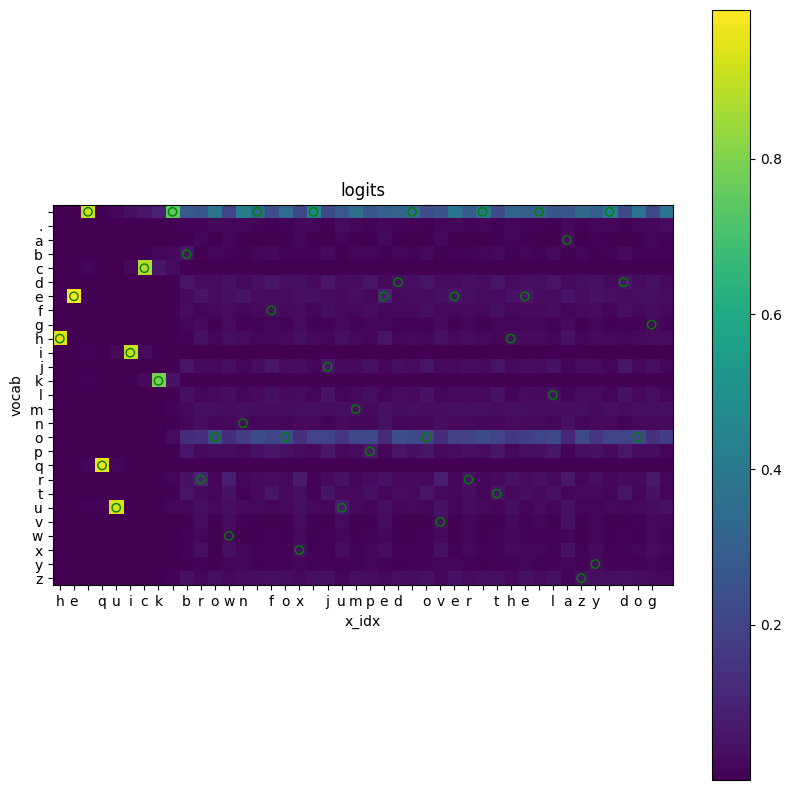

Iteration 65 (loss: 143.815459) Output: 
 ----
 he qcicki m.apeovi xe h lz wehd how boxy evf 
----
Iteration 70 (loss: 143.479719) Output: 
 ----
 he quick frmf bxgw d dr ftw d b.wvpvo ojljvd 
----
Iteration 75 (loss: 143.127412) Output: 
 ----
 he quicknb op.eug.olyoyexvnoa.voooforlxn.pay 
----
Iteration 80 (loss: 142.780769) Output: 
 ----
 he qiic  znoz d  yzy zelel dzeeeo  doadpodew 
----


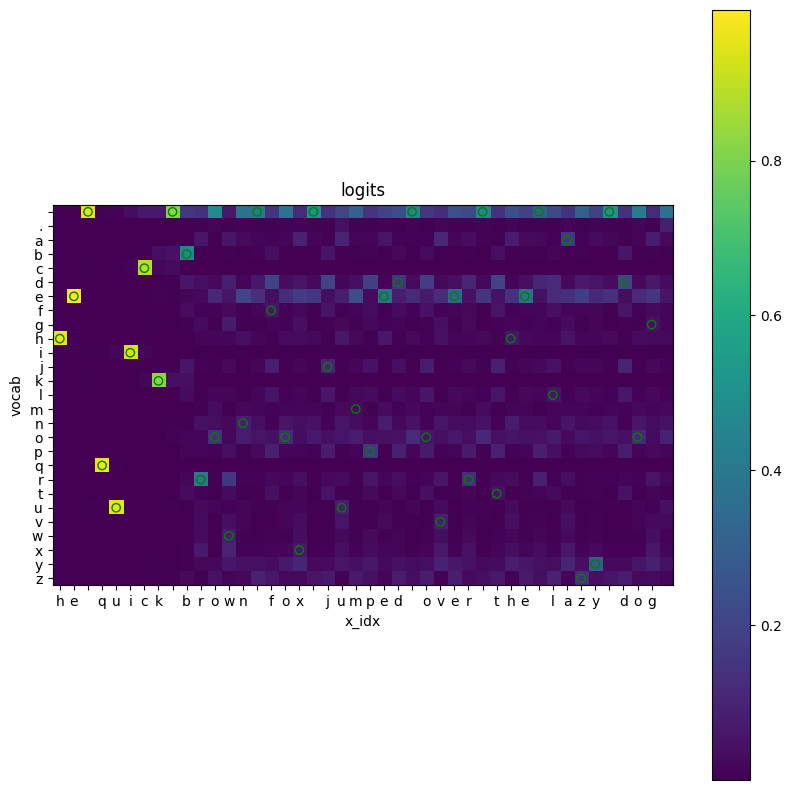

Iteration 85 (loss: 142.410133) Output: 
 ----
 he quickcb br g.p  rugmogreuoy.jnuxheo oxa f 
----
Iteration 90 (loss: 142.008669) Output: 
 ----
 he quick brooxexetowoe.e pvovepephehvyepoowx 
----
Iteration 95 (loss: 141.588903) Output: 
 ----
 he quick bua t zzd z zy pnz  wa gy xu. y  oy 
----
Iteration 100 (loss: 141.144719) Output: 
 ----
 he quick bxoxevomhwnytom ly bvormwvfox d d x 
----


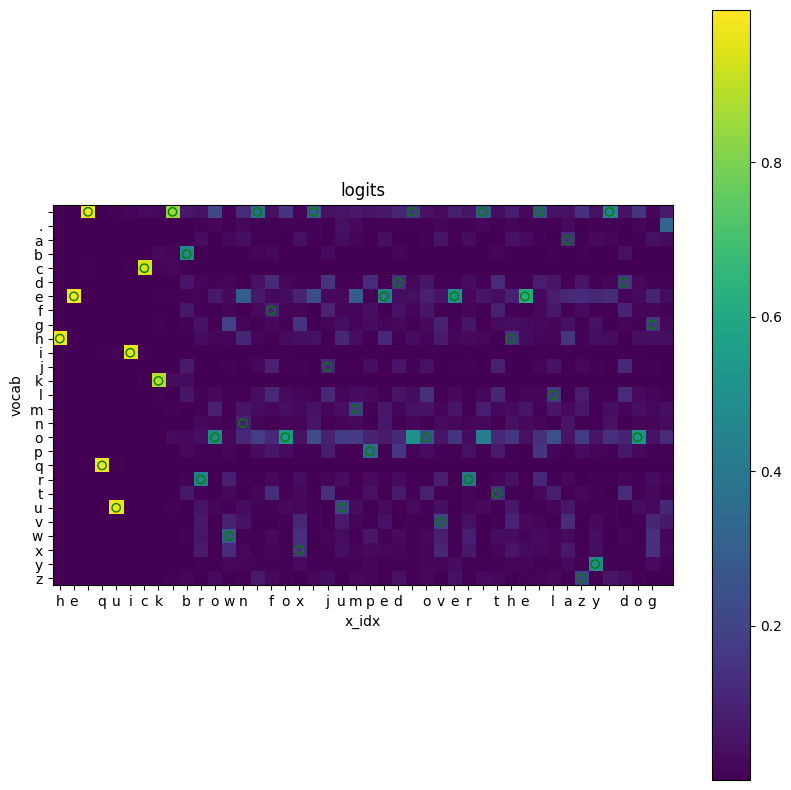

iter 100, loss: 141.052880
Iteration 105 (loss: 140.679271) Output: 
 ----
 we quick bry fodown d to. d d t po f mpn d f 
----
Iteration 110 (loss: 140.204227) Output: 
 ----
 he quick fow.evewaovermt laogyog.yrown xeate 
----
Iteration 115 (loss: 139.713217) Output: 
 ----
 he quick bver .ger o.nowazy jumpe u.zydbr pu 
----
Iteration 120 (loss: 139.201298) Output: 
 ----
 he quick bx lxmpotn lver phorever petuog.dog 
----


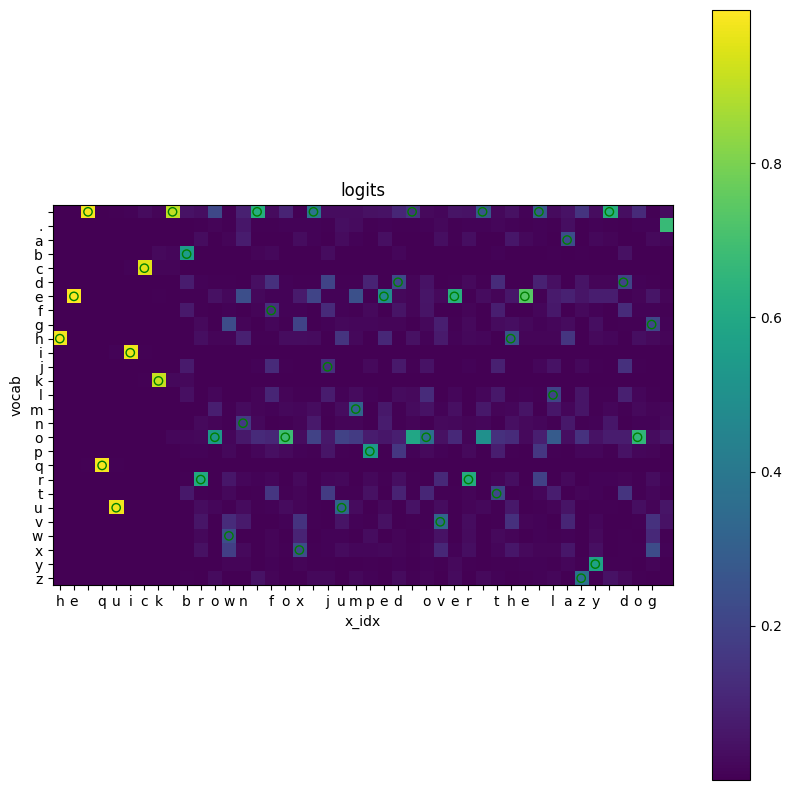

Iteration 125 (loss: 138.713337) Output: 
 ----
 he quick f zy juz d f d zaabr ju.d peaf w  d 
----
Iteration 130 (loss: 138.196153) Output: 
 ----
 he quick bret tumpewrordpxhu.d luephtox f oh 
----
Iteration 135 (loss: 137.656258) Output: 
 ----
 he quick br dmpe juuv rog.g. d  oga f j zy b 
----
Iteration 140 (loss: 137.110518) Output: 
 ----
 he quick br dog.og.pero. lazy tgog. la  ox d 
----


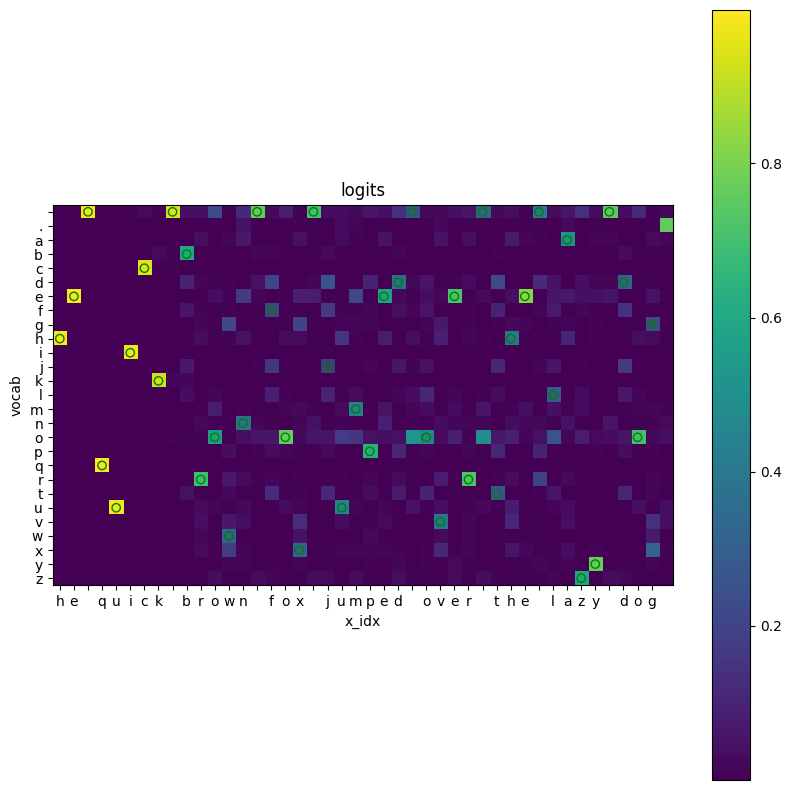

Iteration 145 (loss: 136.558175) Output: 
 ----
 he quick bazy l   uuufove jumzen d w erown j 
----
Iteration 150 (loss: 135.998965) Output: 
 ----
 he quick kpmpedog.mtaor g zy lumpefzlalx tve 
----
Iteration 155 (loss: 135.434710) Output: 
 ----
 he quick brmweeropzy jumpee or d gx dowr tn  
----
Iteration 160 (loss: 134.865173) Output: 
 ----
 he quick browr dowazy  le lv fover zaer ther 
----


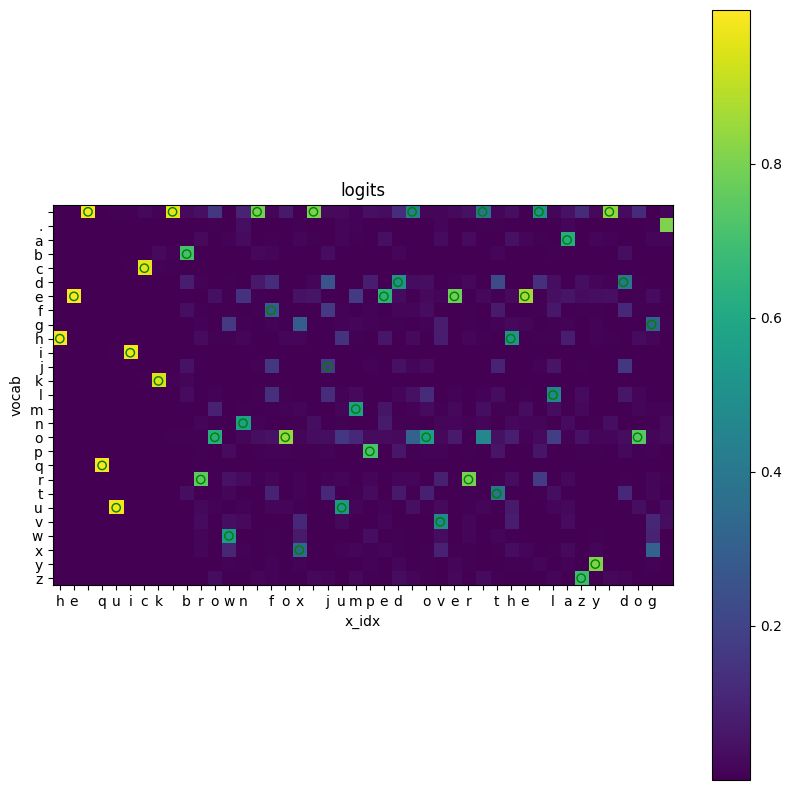

Iteration 165 (loss: 134.291625) Output: 
 ----
 he quick broy jumped lazy row d ln foy foy t 
----
Iteration 170 (loss: 133.714482) Output: 
 ----
 he quick br ther jumped og. overog.pe fox oh 
----
Iteration 175 (loss: 133.134462) Output: 
 ----
 he quick br jher jg. la tumpo jrow  xeaowe f 
----
Iteration 180 (loss: 132.551762) Output: 
 ----
 he quick bomped over led over wn rovnd ther  
----


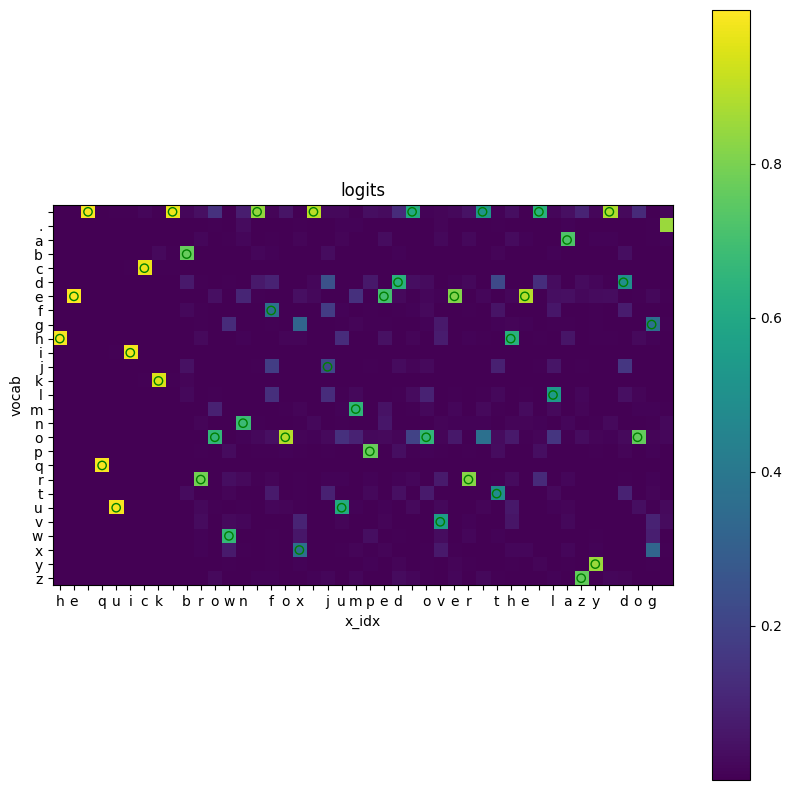

Iteration 185 (loss: 131.966996) Output: 
 ----
 he quick browud tvewnn fog.own fox bhl d  og 
----
Iteration 190 (loss: 131.380895) Output: 
 ----
 he luick broted gumpedotod the mpep dox lhe  
----
Iteration 195 (loss: 130.795087) Output: 
 ----
 he quick jrog.br whed jper ther.jumtn fox fv 
----
Iteration 200 (loss: 130.210157) Output: 
 ----
 he quick brewujr downn joe la tn f g. dzy lh 
----


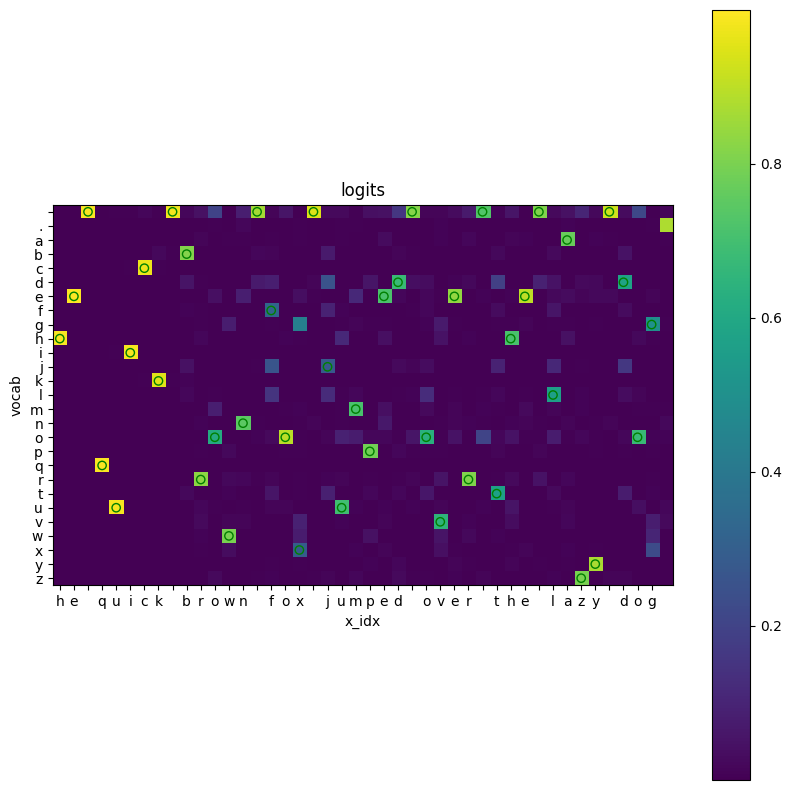

iter 200, loss: 130.093116
Iteration 205 (loss: 129.624142) Output: 
 ----
 he quick brown fox toe fox dog.zy doxnf over 
----
Iteration 210 (loss: 129.036927) Output: 
 ----
 he quick br d jumpeddox l own j.er dogn lpe  
----
Iteration 215 (loss: 128.449588) Output: 
 ----
 he quick btown jumg.zy dog. dog.tr dog. fon  
----
Iteration 220 (loss: 127.862528) Output: 
 ----
 he quick baown fog. tape tampn jumphd lha d  
----


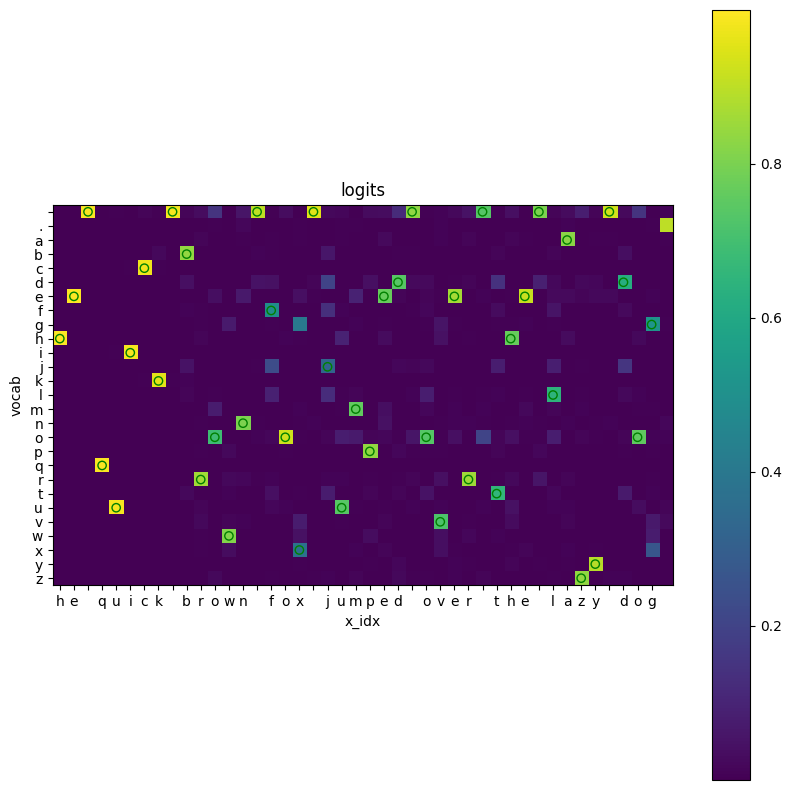

Iteration 225 (loss: 127.276023) Output: 
 ----
 he quick brown fox lazy jumpedog. tx gazy do 
----
Iteration 230 (loss: 126.690205) Output: 
 ----
 he quick br theog. dover tomddehe lazy dog.  
----
Iteration 235 (loss: 126.105203) Output: 
 ----
 he quick brown fog. over trop doverowx fox l 
----
Iteration 240 (loss: 125.521126) Output: 
 ----
 he quick br t ehe lazy douowver the lazy d o 
----


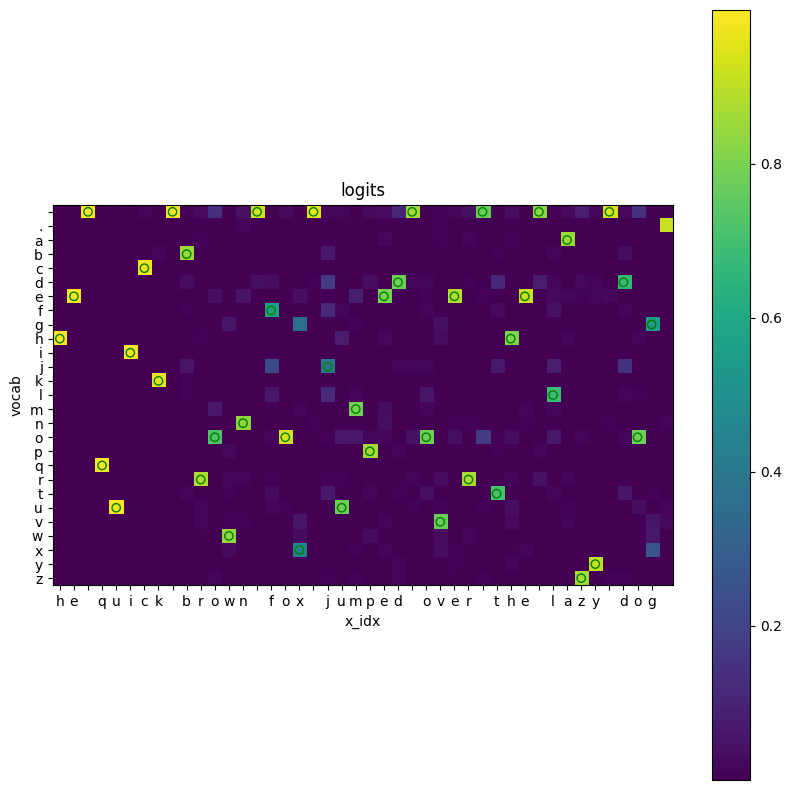

Iteration 245 (loss: 124.938075) Output: 
 ----
 he quick k over tog. fun fog. foe dog. fpeju 
----
Iteration 250 (loss: 124.356161) Output: 
 ----
 he quick brownbr the lampx .uopedop d er bhe 
----
Iteration 255 (loss: 123.775459) Output: 
 ----
 he quick phe lazy dog. oveazy the lazy dog.  
----
Iteration 260 (loss: 123.196072) Output: 
 ----
 he quick brown fog. petrowulazy dox fog.la t 
----


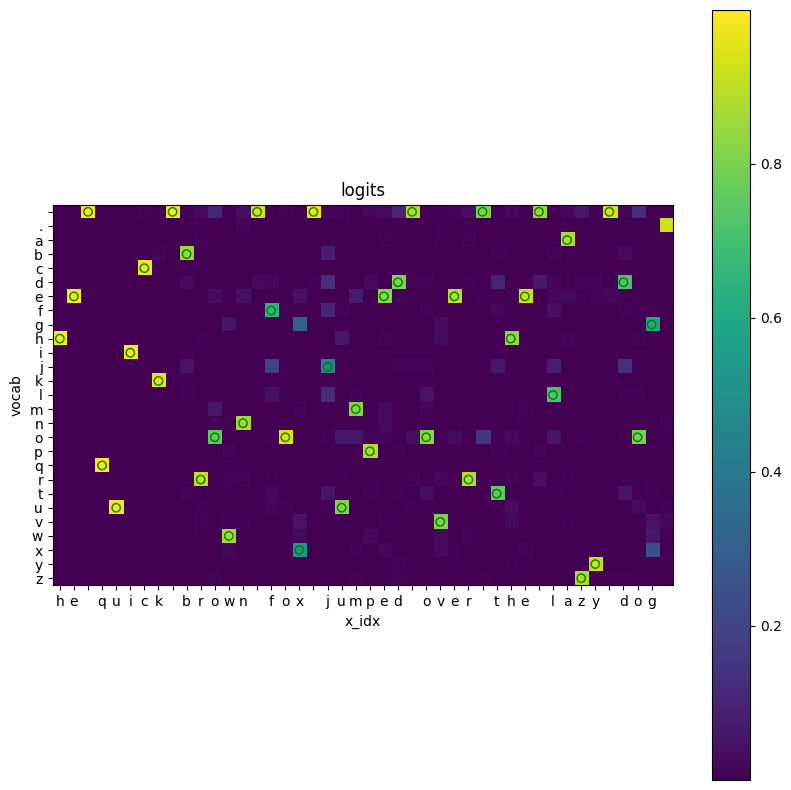

Iteration 265 (loss: 122.618054) Output: 
 ----
 he quick br tox jog. bhe j.ownbfox fog.ze do 
----
Iteration 270 (loss: 122.041499) Output: 
 ----
 he quick brown foe fpe jumw dog. doverown ju 
----
Iteration 275 (loss: 121.466447) Output: 
 ----
 he quick brown fox jrown foxarox jumpedog.d  
----
Iteration 280 (loss: 120.892982) Output: 
 ----
 he quick bror jumped ovy lhed over the fox j 
----


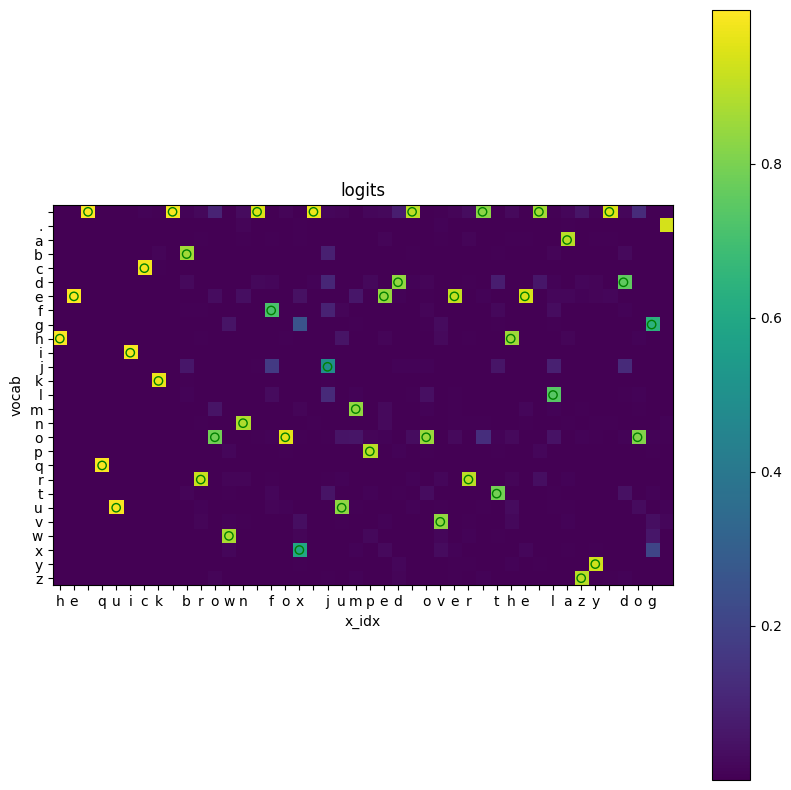

Iteration 285 (loss: 120.321140) Output: 
 ----
 he quick  pe jumped ooe lazy jumpedjover tho 
----
Iteration 290 (loss: 119.750991) Output: 
 ----
 he quick brown dog. the lad over thedlaot du 
----
Iteration 295 (loss: 119.182568) Output: 
 ----
 he quick bver the lazy dog. fox lazy jumped  
----
Iteration 300 (loss: 118.615927) Output: 
 ----
 he quick brown fox fog jumped lazy dowvxr th 
----


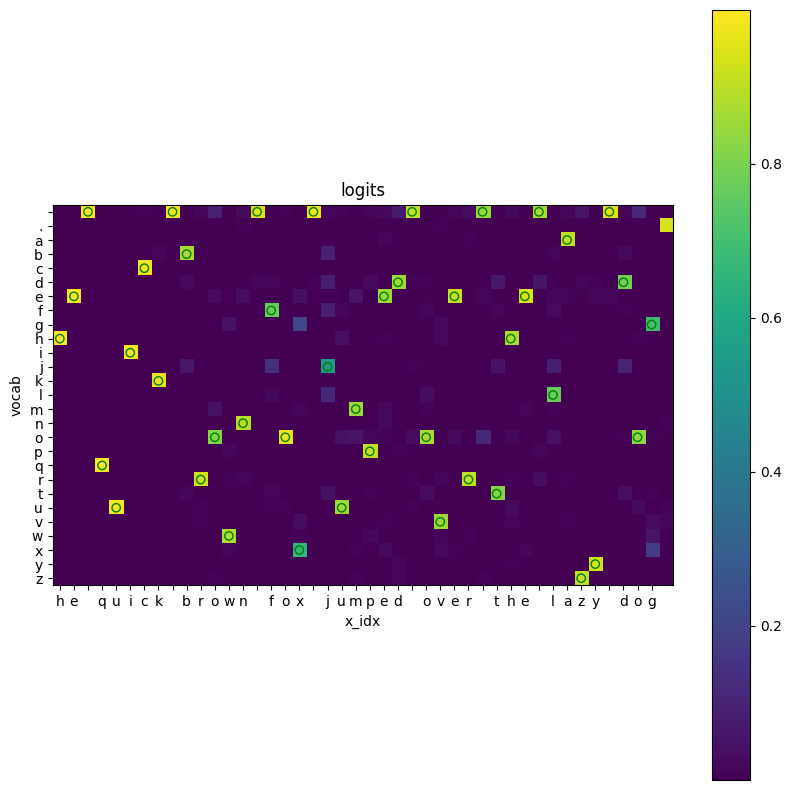

iter 300, loss: 118.502814
Iteration 305 (loss: 118.051102) Output: 
 ----
 he quick br the lazy rhe ln jumpezoedog. ped 
----
Iteration 310 (loss: 117.488139) Output: 
 ----
 he quick jrowr moe jumpedjumpe r the lazhmzy 
----
Iteration 315 (loss: 116.927072) Output: 
 ----
 he quick dfover the la jumped ovtr the la ke 
----
Iteration 320 (loss: 116.367939) Output: 
 ----
 he quick juzp dog. fox dog.ow lazy doked ove 
----


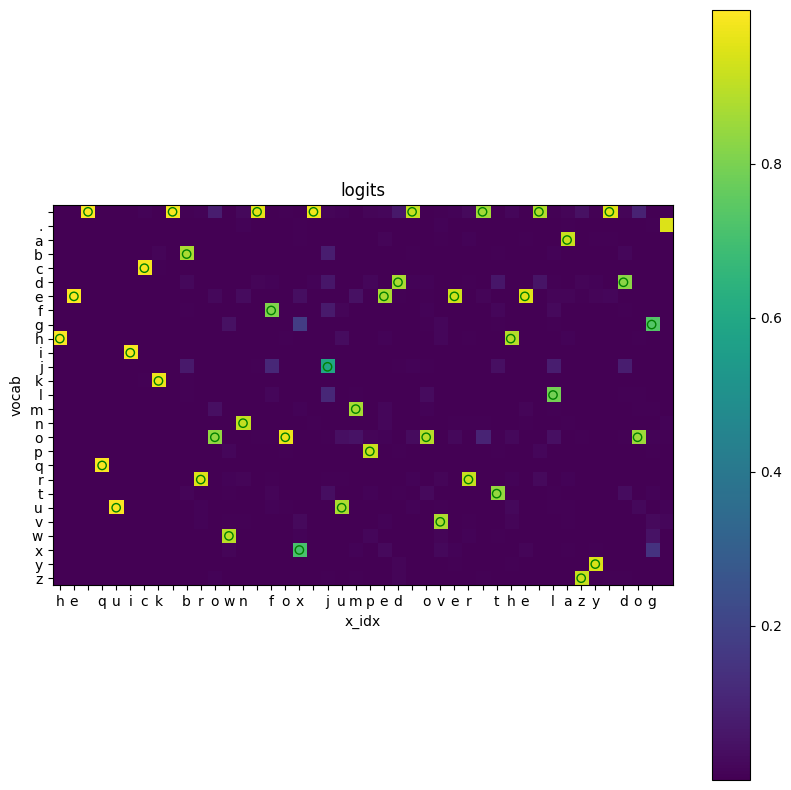

Iteration 325 (loss: 115.810766) Output: 
 ----
 he quick brown fox jumped txer the lazy d ov 
----
Iteration 330 (loss: 115.255586) Output: 
 ----
 he quick br tazyvd ogg.owe gverown foxjfog.  
----
Iteration 335 (loss: 114.702425) Output: 
 ----
 he quick jumped over .he lazy dowverowhe laz 
----
Iteration 340 (loss: 114.151313) Output: 
 ----
 he quick brown fog. fox jumox jumped over t  
----


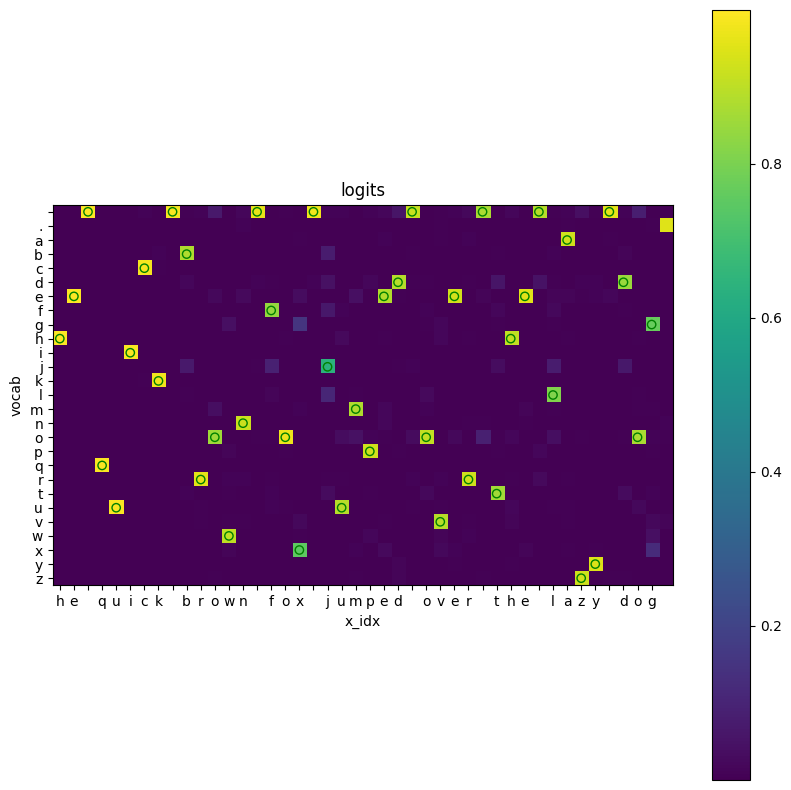

Iteration 345 (loss: 113.602274) Output: 
 ----
 he quick brog.mped over dog.ed the lazy brow 
----
Iteration 350 (loss: 113.055335) Output: 
 ----
 he quick brox fox jumped over the lazy d ove 
----
Iteration 355 (loss: 112.510519) Output: 
 ----
 he quick brown gumped over the lazy dog.ddop 
----
Iteration 360 (loss: 111.967845) Output: 
 ----
 he quick jumped over the lazy dog. dog.jumpe 
----


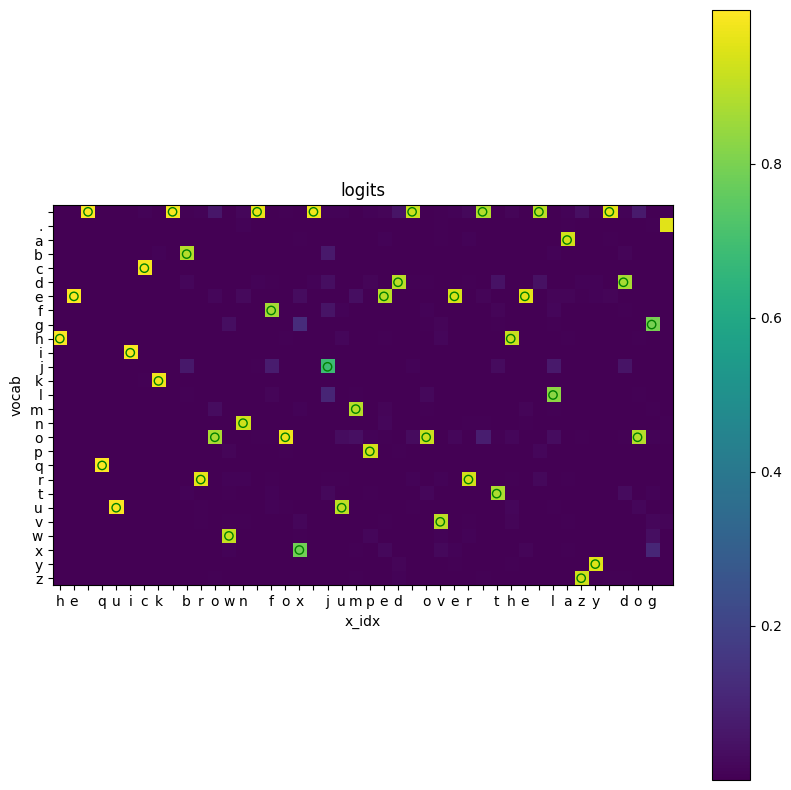

Iteration 365 (loss: 111.427334) Output: 
 ----
 he quick jumped over the labrown jmped over  
----
Iteration 370 (loss: 110.889001) Output: 
 ----
 he quick browlx lazy dog. dethe lazy dogg.br 
----
Iteration 375 (loss: 110.352862) Output: 
 ----
 he quick brown fox jumped over theretver the 
----
Iteration 380 (loss: 109.818929) Output: 
 ----
 he qucck brown fovd lazy dog.ugver the jumpn 
----


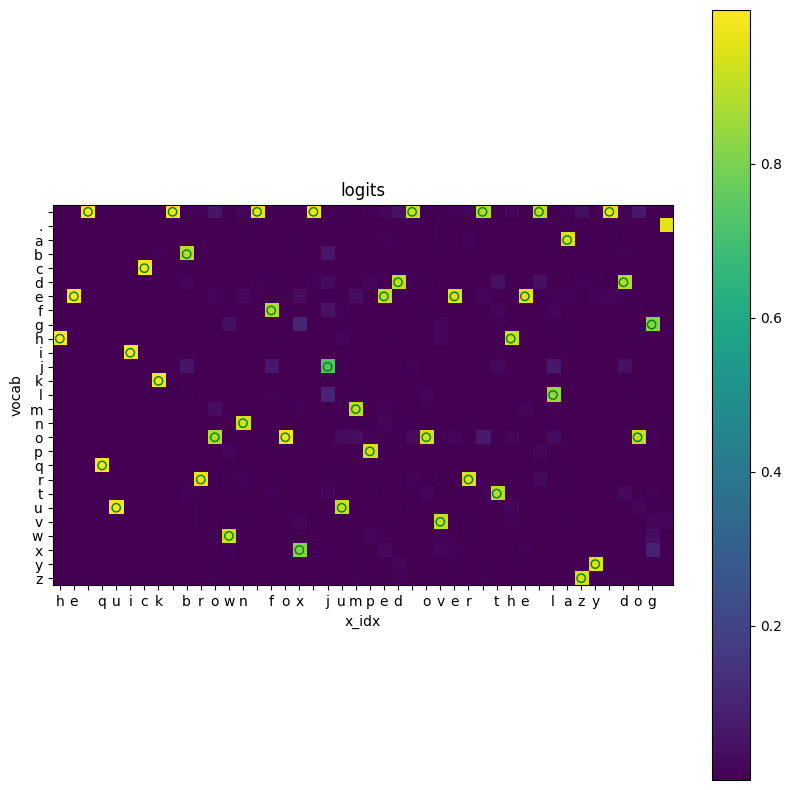

Iteration 385 (loss: 109.287213) Output: 
 ----
 he quicc brown fox jumped over the lazy dog. 
----
Iteration 390 (loss: 108.757724) Output: 
 ----
 he quick browczy do.epumpe jumped over the l 
----
Iteration 395 (loss: 108.230470) Output: 
 ----
 he quick browvd over the lazy dog. the lazy  
----
Iteration 400 (loss: 107.705458) Output: 
 ----
 he quick brown fog. fox jumpey overotver the 
----


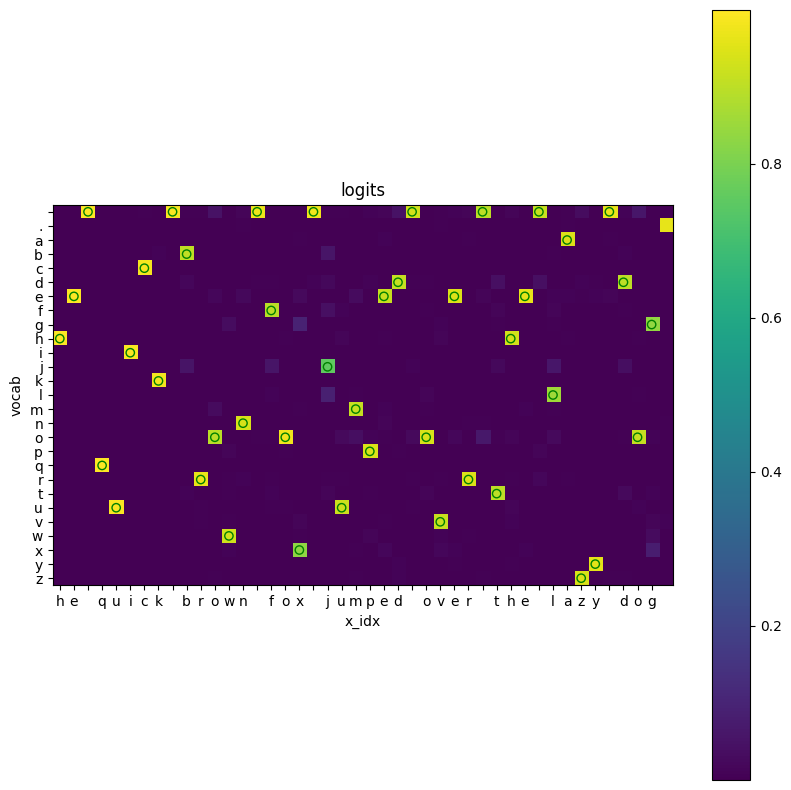

iter 400, loss: 107.600725
Iteration 405 (loss: 107.182693) Output: 
 ----
 he quick brown jumpn jy the lazy dog. fhe l  
----
Iteration 410 (loss: 106.662179) Output: 
 ----
 he quick brown fox jumped over thh jumpey do 
----
Iteration 415 (loss: 106.143920) Output: 
 ----
 he quick jumped over the lazy dog.ddog.zy do 
----
Iteration 420 (loss: 105.627919) Output: 
 ----
 he quick brown fog. dog. flx jumped over fox 
----


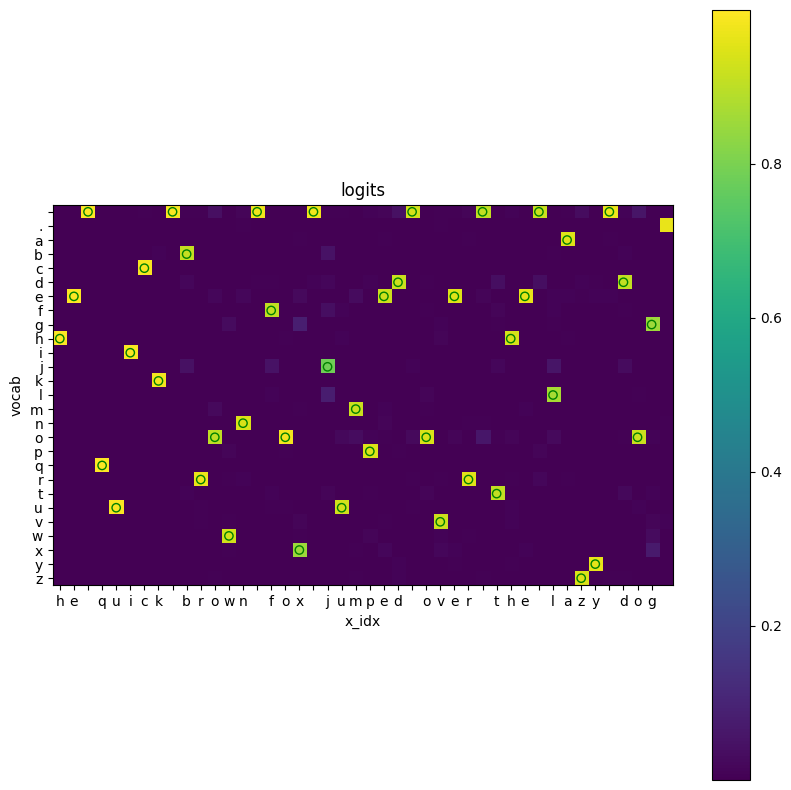

Iteration 425 (loss: 105.114178) Output: 
 ----
 he quick brog. toerog.ernthe lazy jumped ove 
----
Iteration 430 (loss: 104.602697) Output: 
 ----
 he quick brown fox jumped dovewn fox jumped  
----
Iteration 435 (loss: 104.093477) Output: 
 ----
 he quick brown fox jumped over . lazy dog.ey 
----
Iteration 440 (loss: 103.586518) Output: 
 ----
 he quick browndfo.p dog.ufog.edog.edog.ea d  
----


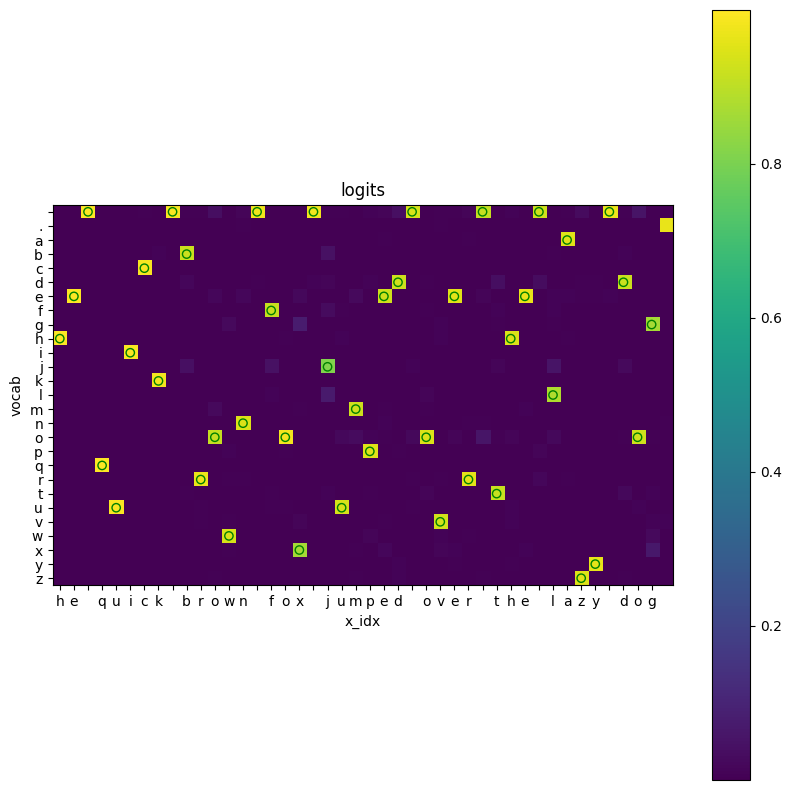

Iteration 445 (loss: 103.081820) Output: 
 ----
 he quick brown fog.br the jumped over the or 
----
Iteration 450 (loss: 102.579380) Output: 
 ----
 he quick brown fox jumped ov fog.zy dox jump 
----
Iteration 455 (loss: 102.079198) Output: 
 ----
 he quick brown foxdkox julazy dog. pazhedog. 
----
Iteration 460 (loss: 101.581271) Output: 
 ----
 he quick bhe lazy dog. fox jumped over the j 
----


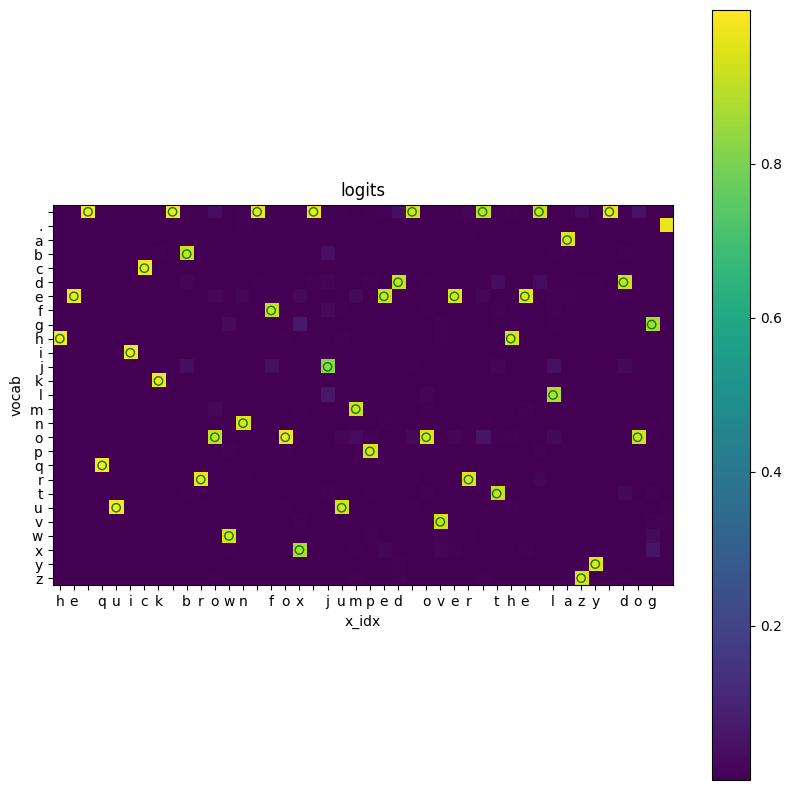

Iteration 465 (loss: 101.085597) Output: 
 ----
 he quick brown fox jumped over the lazy zhe  
----
Iteration 470 (loss: 100.592172) Output: 
 ----
 he quick bn dog. jvown fox jumped over the l 
----
Iteration 475 (loss: 100.100993) Output: 
 ----
 he quick brown fox jumped over the ladpezy j 
----
Iteration 480 (loss: 99.612057) Output: 
 ----
 he quick brown fox jumped over the lazy dog. 
----


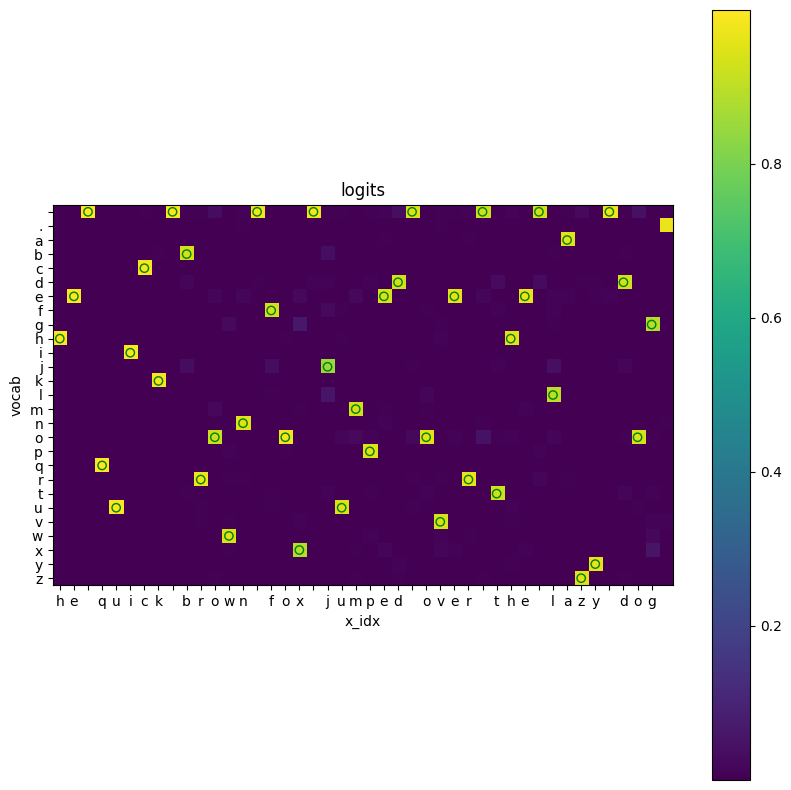

Iteration 485 (loss: 99.125360) Output: 
 ----
 he quick brown foed over the lazy dog.ewedum 
----
Iteration 490 (loss: 98.640896) Output: 
 ----
 he quick brown fog. dog. tumpe lazy dog.zy d 
----
Iteration 495 (loss: 98.158662) Output: 
 ----
 he quick brown fovd ovover dog.edog. dog.g.  
----


In [20]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np
import matplotlib.pyplot as plt

def lossFun(inputs, targets, hprev):
    """
    inputs,targets are both list of integers.
    hprev is Hx1 array of initial hidden state
    returns the loss, gradients on model parameters, and last hidden state
    """
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars

        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
        
    # backward pass: compute gradients going backwards
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients

    logits = np.zeros((vocab_size, len(inputs)))
    for t in range(len(inputs)):
        logits[:, t] = ps[t].reshape(-1)

    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1], logits

def sample(h, seed_ix, n):
    """ 
    sample a sequence of integers from the model 
    h is memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    
    ps = []
    for t in range(n):
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes, ps

def plot_logits(logits, x, chars, ix_to_char):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    im = ax.imshow(logits)
    ax.set_xticks(range(len(x[1:])))
    ax.set_xticklabels([ix_to_char[ix] for ix in x[1:]])
    ax.set_yticks(range(len(chars)))
    ax.set_yticklabels(sorted(chars))
    plt.colorbar(im) 
    
    for t, char_idx in enumerate(x[1:]):
        char = ix_to_char[char_idx]
        y_idx = sorted(list(char_to_ix.keys())).index(char)
        ax.scatter(t, y_idx, color='green', facecolor='none')
    
    plt.title('logits')
    plt.xlabel('x_idx')
    plt.ylabel('vocab')
    plt.show()

data = 'the quick brown fox jumped over the lazy dog.'
print('Training Data: \n', data)

chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
sample_length = data_size-1
seq_length =  sample_length # number of steps to unroll the RNN for
learning_rate = 1e-1

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

max_iters = 500
while n < max_iters:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    if p+seq_length+1 >= len(data) or n == 0: 
        hprev = np.zeros((hidden_size,1)) # reset RNN memory
        p = 0 # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
    targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

    # sample from the model now and then
    if n % 5 == 0:
        # print('input character: ', ix_to_char[inputs[0]])
        sample_ix, ps = sample(hprev, inputs[0], sample_length)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print('Iteration %d (loss: %f) Output: \n ----\n %s \n----' % (n, smooth_loss, txt))

    # forward seq_length characters through the net and fetch gradient
    loss, dWxh, dWhh, dWhy, dbh, dby, hprev, logits = lossFun(inputs, targets, hprev)

    if n % 20 == 0:
        plot_logits(logits, inputs, chars, ix_to_char)

    smooth_loss = smooth_loss * 0.999 + loss * 0.001
    if n % 100 == 0:
        print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

    # perform parameter update with Adagrad
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

    p += seq_length # move data pointer
    n += 1 # iteration counter 

### EXERCISE3-TASK2: [10 marks] 

The Mackey-Glass dataset is a well-known chaotic time series commonly used in time series prediction research. It is included in the folder for this assignment, and depicted in the output of the cell block below. 

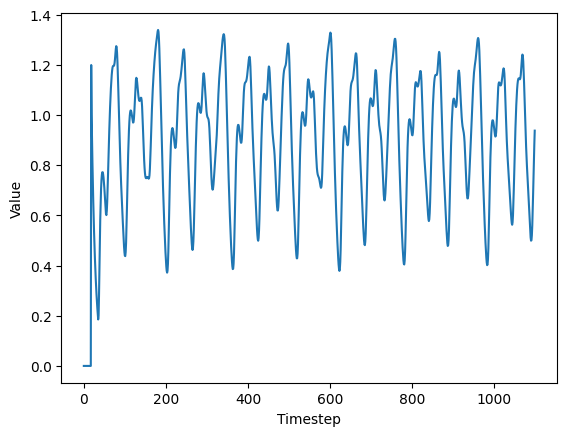

In [26]:
import pandas as pd
import numpy as np

mgdf = pd.read_csv('mackey_glass.csv')

fig,ax = plt.subplots(1,1)
ax.plot(mgdf.index, mgdf['t'])
ax.set_xlabel('Timestep')
ax.set_ylabel('Value')
plt.show()

**Objective:** Build an LSTM model using the PyTorch library and apply it to the Mackey-Glass dataset. 

**Detailed Instructions:** Implement an LSTM model using PyTorch’s `nn.Module` class and structure the training process with optimization and evaluation metrics. They should start by importing necessary libraries, including `torch`, `torch.optim`, and `torch.utils.data`, to structure the training loop and evaluation framework. 

Being by splitting the dataset into training (40%), validation (40%), and test (20%) sets. Then, generate input-output pairs with a lookback window of 1, which slides over the series to predict the next step. Next, define an LSTM model class in PyTorch with one LSTM layer and a linear layer for predicting single values from hidden states. Use Mean Squared Error (MSE) loss, and use the Adam optimizer. Train the model for 2000 epochs, and evaluate and record the (RMSE) on both training and validation set every 100 epochs. After training is complete, plot curves of both the training error and validation error.

Epoch 0: train RMSE 0.6442, val RMSE 0.6837
Epoch 100: train RMSE 0.0674, val RMSE 0.0343
Epoch 200: train RMSE 0.0678, val RMSE 0.0356
Epoch 300: train RMSE 0.0678, val RMSE 0.0348
Epoch 400: train RMSE 0.0677, val RMSE 0.0354
Epoch 500: train RMSE 0.0682, val RMSE 0.0364
Epoch 600: train RMSE 0.0674, val RMSE 0.0342
Epoch 700: train RMSE 0.0678, val RMSE 0.0348
Epoch 800: train RMSE 0.0687, val RMSE 0.0365
Epoch 900: train RMSE 0.0674, val RMSE 0.0346
Epoch 1000: train RMSE 0.0692, val RMSE 0.0384
Epoch 1100: train RMSE 0.0680, val RMSE 0.0360
Epoch 1200: train RMSE 0.0673, val RMSE 0.0341
Epoch 1300: train RMSE 0.0684, val RMSE 0.0369
Epoch 1400: train RMSE 0.0673, val RMSE 0.0343
Epoch 1500: train RMSE 0.0685, val RMSE 0.0362
Epoch 1600: train RMSE 0.0673, val RMSE 0.0341
Epoch 1700: train RMSE 0.0673, val RMSE 0.0344
Epoch 1800: train RMSE 0.0673, val RMSE 0.0341
Epoch 1900: train RMSE 0.0674, val RMSE 0.0342


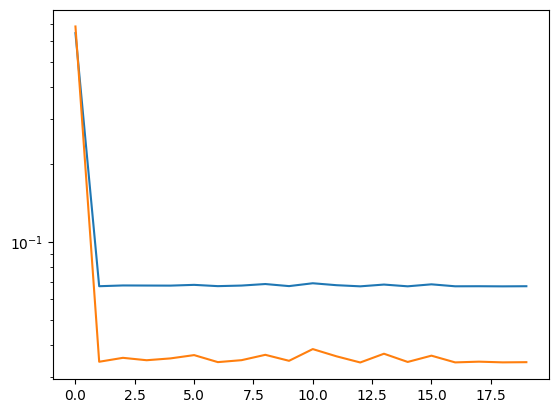

In [163]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn


epoch 0, train loss: 28.734962165355682, val loss: 30.604942679405212
epoch 100, train loss: 0.12687848519999534, val loss: 0.033428349590394646
epoch 200, train loss: 0.1259923647157848, val loss: 0.03351088147610426
epoch 300, train loss: 0.127121924480889, val loss: 0.03328455818700604
epoch 400, train loss: 0.1258984818123281, val loss: 0.03325373848201707
epoch 500, train loss: 0.126205139211379, val loss: 0.03324971135589294
epoch 600, train loss: 0.12686942785512656, val loss: 0.033468622888904065
epoch 700, train loss: 0.12650087632937357, val loss: 0.03535931807709858
epoch 800, train loss: 0.12835058034397662, val loss: 0.03348528523929417
epoch 900, train loss: 0.12614411441609263, val loss: 0.03380551244481467
epoch 1000, train loss: 0.12606049375608563, val loss: 0.033310477549093775
epoch 1100, train loss: 0.12859102874062955, val loss: 0.03413087912485935
epoch 1200, train loss: 0.12572625404573046, val loss: 0.035384004513616674
epoch 1300, train loss: 0.126029251259751

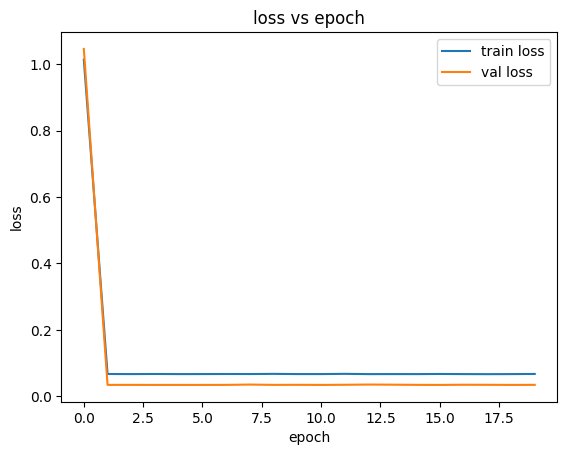

In [42]:
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader

class MGDataset(Dataset):
    def __init__(self, data, bptt=1):
        self.data = torch.from_numpy(data).float()
        self.bptt = bptt

    def __len__(self):
        return len(self.data) - self.bptt        
    def __getitem__(self, idx):
        x = self.data[idx:idx+self.bptt]
        y = self.data[idx+self.bptt]
        return x, y

class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(1, 50, 1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x[:, -1, :])
        return x

x = mgdf['t'].values

tmp = int(0.4 * len(x))
train_dataset = MGDataset(x[:tmp])
val_dataset = MGDataset(x[tmp:2*tmp])
test_dataset = MGDataset(x[2*tmp:])

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size)
test_dataloader = DataLoader(test_dataset, batch_size)

model = LSTM()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

train_losses = []
val_losses = []
for epoch in range(2000):
    train_loss = 0
    model.train()
    for x, y in train_dataloader:
        optimizer.zero_grad()
        y_hat = model(x.unsqueeze(-1))
        loss = loss_fn(y_hat, y.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for x, y in val_dataloader:
            y_hat = model(x.unsqueeze(-1))
            val_loss += loss_fn(y_hat, y.unsqueeze(-1)).item()
    
    train_rmse = np.sqrt(train_loss / len(train_dataloader))
    val_rmse = np.sqrt(val_loss / len(val_dataloader))
    
    if epoch % 100 == 0:
        print(f'epoch {epoch}, train loss: {train_loss}, val loss: {val_loss}')
        train_losses.append(train_rmse)
        val_losses.append(val_rmse)

plt.figure()
plt.plot(list(range(0, 20)), train_losses, label='train loss')
plt.plot(list(range(0, 20)), val_losses, label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch')
plt.legend()
plt.show()

## Exercise 5: Attention

### EXERCISE5-TASK1: [10 Marks] 
Select and visualize a fixed attention mechanism applied to augment a time series prediction model for the Mackey-Glass dataset.

**Detailed Instructions:** The objective is to examine the role of a fixed attention mechanism in a time series context by visualizing the effect of fixed attention weights on different data windows from the Mackey-Glass dataset.
Choose a kernel function (e.g., Gaussian, Laplace) to assign similarity-based attention weights to each timestep in a window based on its distance from the query value. 

Starting at timestep 42 in the Mackey-Glass dataset, create a series of 100 data windows, each with a length of 50 timesteps. Construct each subsequent window by moving forward 5 timesteps from the previous window’s starting point. This will create staggered, partially overlapping windows.
Use the last timestep in each window as the query value and apply your kernel function to calculate similarity-based attention weights for each timestep in the window.

Visualize the results as a heatmap, where each row represents a different data window and each column represents a timestep in the lookback window (from -49 to 0, with 0 being the most recent timestep). Include a colorbar and labels for the x- and y-axes.

Write a few sentences to interpret the colors in the heatmap in relation to the similarity of each timestep to the query value. Higher intensity (brighter) colors should correspond to timesteps that are more similar (or more relevant, according to the fixed kernel) to the query. Describe any patterns you observe in the heatmap. Consider whether certain intervals in the past are consistently weighted more heavily and if there are any repeated structures in the weighting patterns.
Finally, reflect on the limitations of this fixed attention mechanism. Consider how it differs from adaptive attention mechanisms covered in class, which dynamically adjust attention weights based on the content of each window. What might be lost by using a fixed attention approach in terms of capturing temporal dependencies in the data?

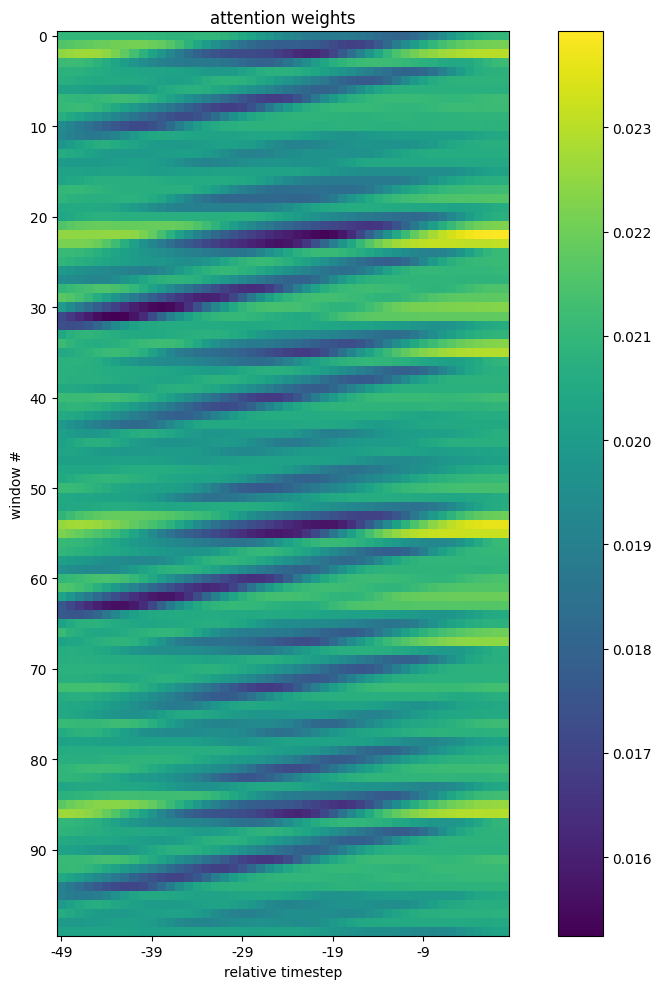

In [59]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

import matplotlib.pyplot as plt

data = mgdf['t'].values

window_length = 50
stride = 5
n_windows = 100
start_idx = 42

def gaussian_kernel(x_1, x_2,):
    return np.exp(-np.abs(x_1-x_2)**2 / 2)

att_matrix = np.zeros((n_windows, window_length))

for i in range(n_windows):
    idx = start_idx + (i * stride)
    window = data[idx:idx + window_length]
    q = window[-1]
    
    for j in range(window_length):
        att_matrix[i, j] = gaussian_kernel(window[j], q)
    
    att_matrix[i] = att_matrix[i] / np.sum(att_matrix[i])

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(att_matrix)

x_ticks = np.arange(0, window_length, 10)
x_labels = [str(x-49) for x in x_ticks]
y_ticks = np.arange(0, n_windows, 10)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_ticks)

ax.set_xlabel('relative timestep')
ax.set_ylabel('window #')
ax.set_title('attention weights')

plt.tight_layout()
plt.colorbar(im)
plt.show()


In [ ]:
# As expected, most attn weights are highest for most recent timesteps. Exceptions to this are where some windows attend most to the earliest timesteps, bc it is attending to similar values  in the previous cycle of the dataset
# you can see a periodic patten repeat across the windows, this is because of the periodic nature ofthe dataset.
# This fixed attn cannot learn to generalize to new temporal patterns unlinke learned attention functions.